
<img src="img/1.png">

# Supervised Machine Learning Approaches in order to Optimise The Performance of Energy Storage Devices on Smart Grids

<img src="img/2.png">


## 1- Introduction

  
   As it is obvious, wind speed and solar radiation intensity fluctuate during a day, amounts of electrical energy produced by wind power plants and solar power plants are not stable and they do not have fixed power generation during days months and years. One way to smoothing out the fluctuations in energy generation and demand is using an external electrical energy storage like a couple of battery storage, which are able to charge and discharge in the moments that is needed. In this investigation, different regression approaches will be used to optimize battery operation in an smart grid. To optimize moments of charging and discharging, a list of data have been collected by several sensors that measure wind speed, solar intensity, temperature , energy consumption and other factors that are effective. In this optimizing process several regression methods including Linear Regression, Ridge Regression, Lasso Regression and Elastic Net Regression, XGboost and Artificial Neural Network will be used to predict optimize value for battery energy in each moment.

## 2- Data Manegment
### 2-1 Data Preparation 
 The data which will be used in this investigation have been collected from several websites in 48 hours.

### 2-2 Data Exploration

#### 2-2-1 Initialization
****Note: Enable lines below if you haven't installed "mlxtend" or "tensorflow" on your system before.****

In [1]:
# pip install mlxtend

In [2]:
# pip install tensorflow

In [3]:
# pip install git+https://github.com/tensorflow/docs

In [4]:
# please run Final.ipynb from the link below if you had any problem with installing necessary deep learning libraries.

# https://github.com/HosseinSLT/ML/blob/master/Smart%20Grid/Final.ipynb

In [5]:
import pywt
import os.path
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib. pyplot as plt


import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from tensorflow import keras
from tensorflow.keras import layers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score


from math import sqrt
from pathlib import Path
from scipy.stats import iqr
from seaborn import pairplot

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection

from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as knn

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.graphics.correlation import plot_corr
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

Using TensorFlow backend.


#### 2-2-2 Data examination

In [6]:
## Loading data and determining the header
data_folder = Path("data.csv")
data=pd.read_csv(data_folder , header=2)
dfr=pd.DataFrame(data)

print("Data set dimensions : {}".format(data.shape))
data.head()


Data set dimensions : (50, 11)


,Day or Night,Hours,Wind speed (Km/h),Wind plant working percantage,Air density (Kg/m3),Solar radietion intensity (Kwh/m2),Solar plant working percantage,Temprature (C),Relative humidity (%),Energy consumption (MWh),Battery Energy (Mwh)
0,Night,1,NaN,100,NaN,0,100,NaN,85,1.3,0.2
1,Night,2,55,100,1.225,0,100,25,85,1.2,0.29
2,Night,3,60,100,1.225,0,100,24,85,1.2,0.28
3,Night,4,65,100,1.225,0,100,24,85,1.1,0.37
4,Night,5,60,100,1.225,0,100,24,83,1,0.48


In [7]:
# removing needless columns and raws
dfr.drop(49,axis=0,inplace=True)
dfr.drop('Hours', axis=1 , inplace=True )


In [8]:
#Encoding

#Maping each category to a vector that contains 1 and 0 denoting the presence or absence of the feature
#In "time" column 0 means that it is night , 1 shows that is is day and NAN means it is not clear

dfr=pd.get_dummies(dfr, prefix=['Time'] , columns=["Day or Night"])

day=dfr["Time_Day"]
night=dfr["Time_Night"]

time=day*2+night
time
time=time.replace([0, 1, 2], [np.nan, 0, 1])

dfr=dfr.drop('Time_Day', axis=1,)
dfr=dfr.drop('Time_Night', axis=1,)

dfr['time']=time

In [9]:
#considering abbreviated name to each feature inorder to easy use

df=dfr.copy()


df.columns=["wind_s"]+["wind_p"]+["ad"]+["solar_r"]+["solar_p"]+["temp"]+["rh"]+["eng"]+["b_eng"]+["time"]

df.index.name= "NUM"

In [10]:
# changing data type from object to float

df=df.astype(float)

In [11]:
# chenging order of columns
df=df[["time","wind_s","wind_p","ad","solar_r","solar_p","temp","rh","eng","b_eng"]]


#Defining parameters that will be used further

columns=["Time","Wind speed (Km/h)","Wind plant working percantage","Air density (Kg/m3)","Solar radietion intensity (Kwh/m2)",
         "Solar plant working percantage" ,"Temprature (C)","Relative humidity (%)","Energy consumption (MWh)",
         "Battery Energy (Mwh)"]


columns9=["Time","Wind speed (Km/h)","Wind plant working percantage","Air density (Kg/m3)","Solar radietion intensity (Kwh/m2)",
         "Solar plant working percantage" ,"Temprature (C)","Relative humidity (%)","Energy consumption (MWh)"]

Z=["red" ,"skyblue" , "green" , "orange" , "yellow" , "purple" , "brown" , "pink" , "darkblue" , "darkred"] 




#### 2-2-3 Data visualization

In [12]:
# Visualizing the central tendency, dispersion and shape of a dataset’s distribution
df.loc[:, df.columns != 'time'].describe()

,wind_s,wind_p,ad,solar_r,solar_p,temp,rh,eng,b_eng
count,46.000000,47.000000,46.000000,47.000000,47.000000,45.000000,47.000000,48.000000,48.000000
mean,54.130435,98.297872,1.225000,355.319149,98.723404,28.577778,84.957447,1.489583,0.273042
std,5.897678,6.014168,0.000211,421.079622,5.363735,3.285567,0.358587,0.301937,0.292944
min,40.000000,70.000000,1.224000,0.000000,70.000000,24.000000,83.000000,1.000000,-0.257000
25%,50.000000,100.000000,1.225000,0.000000,100.000000,25.000000,85.000000,1.200000,0.086500
50%,55.000000,100.000000,1.225000,100.000000,100.000000,29.000000,85.000000,1.450000,0.255000
75%,60.000000,100.000000,1.225000,800.000000,100.000000,32.000000,85.000000,1.725000,0.455000
max,65.000000,100.000000,1.226000,1100.000000,100.000000,33.000000,86.000000,2.000000,0.800000


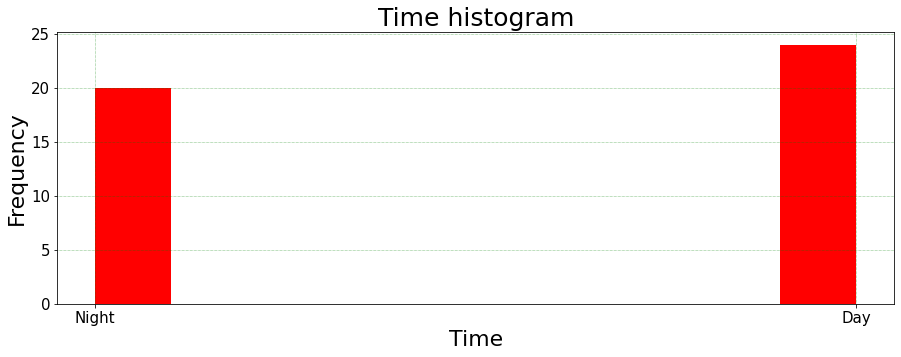

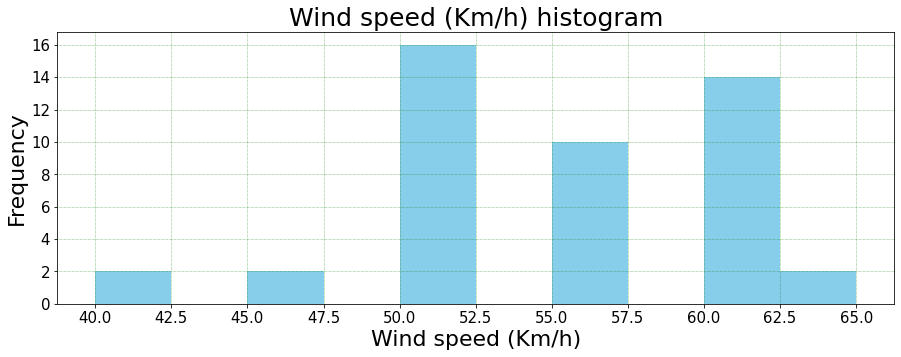

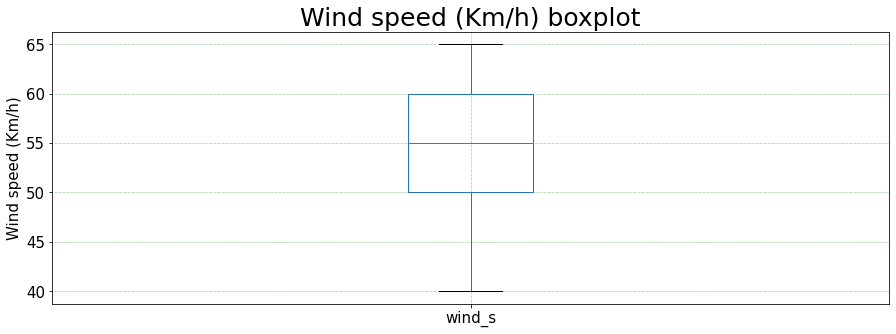

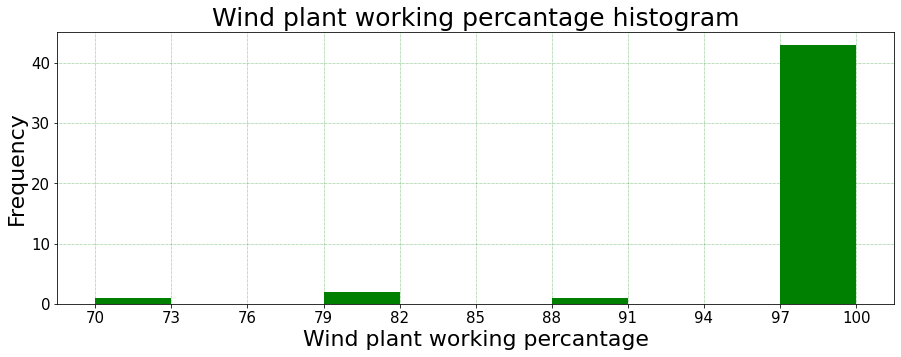

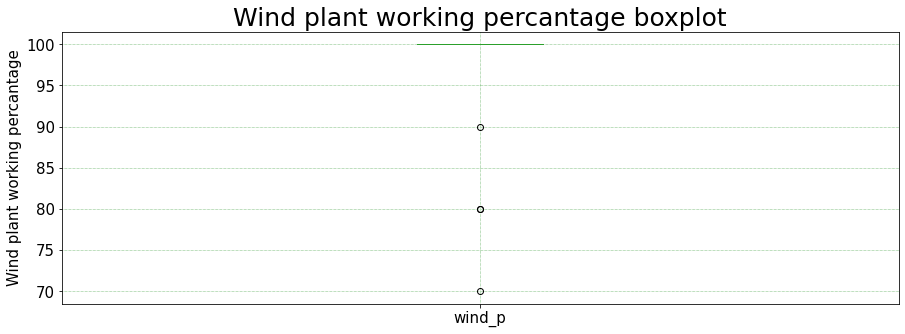

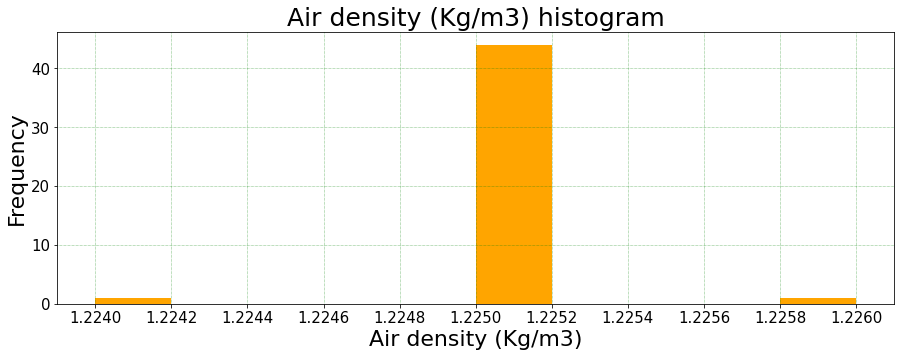

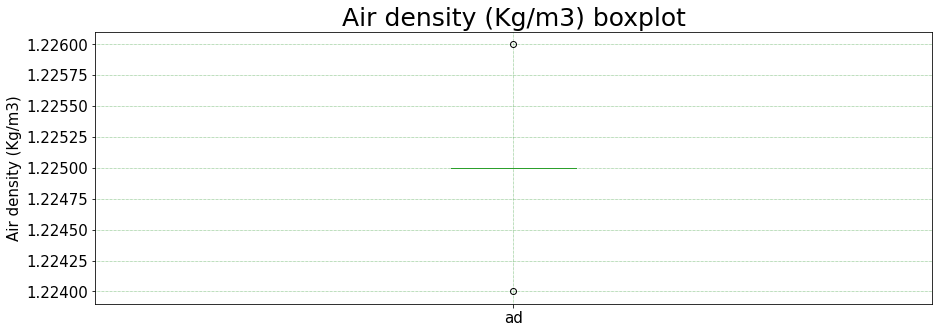

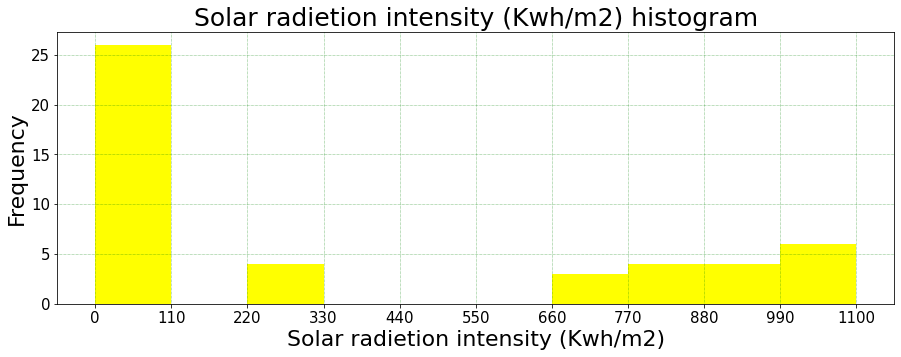

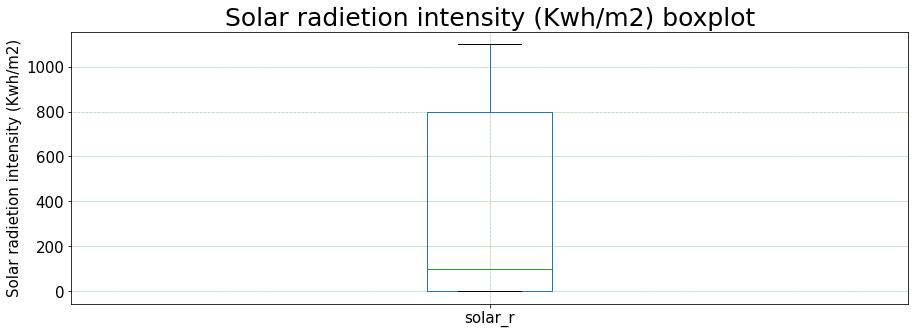

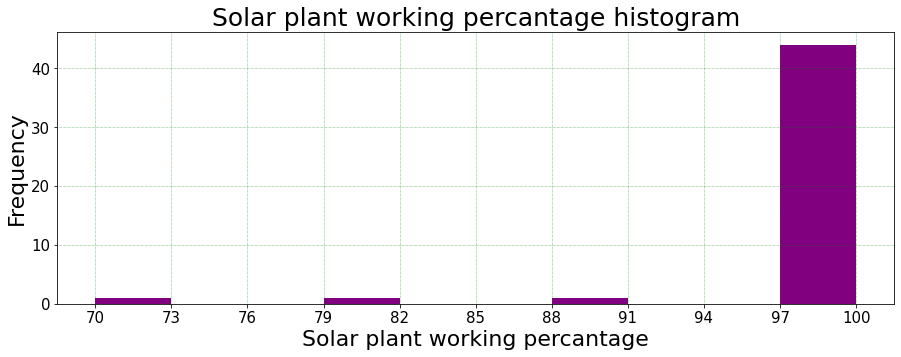

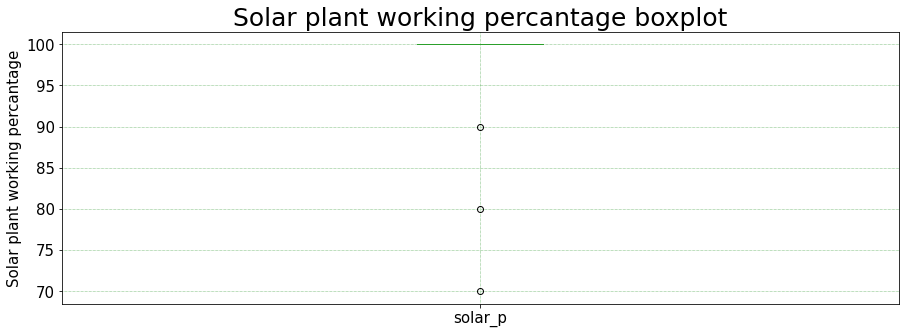

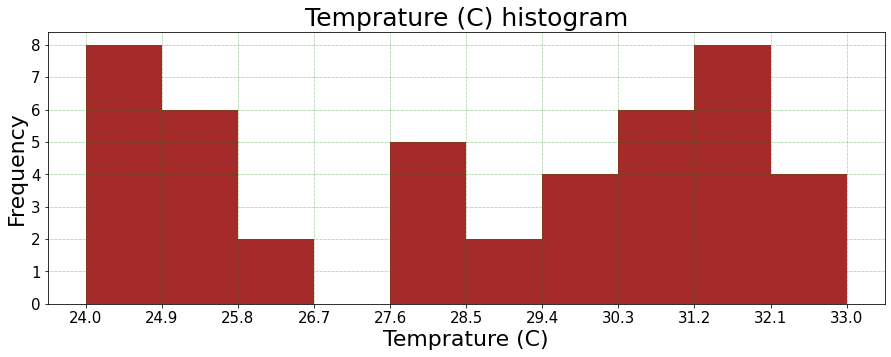

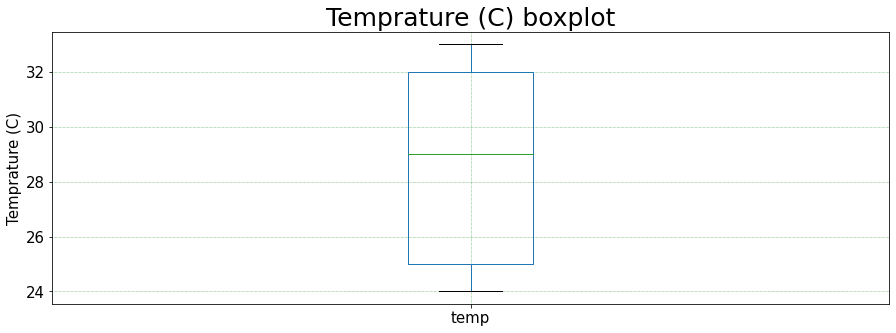

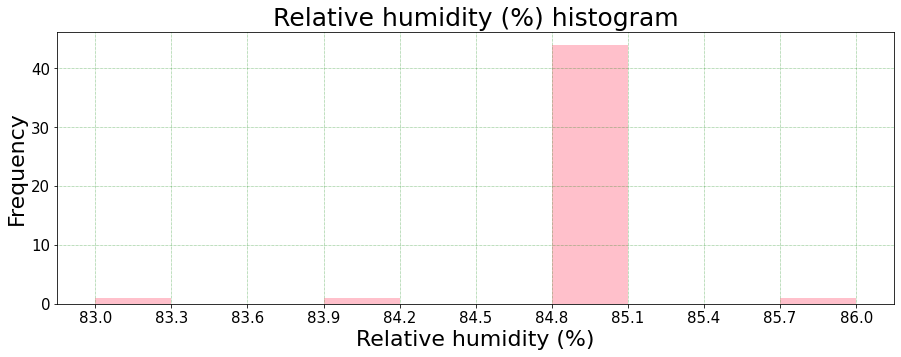

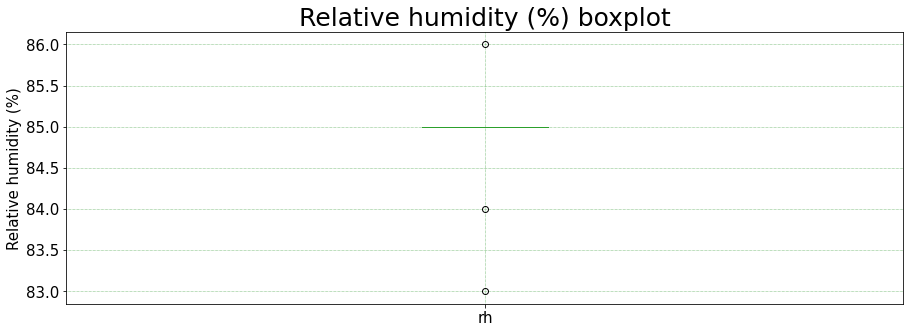

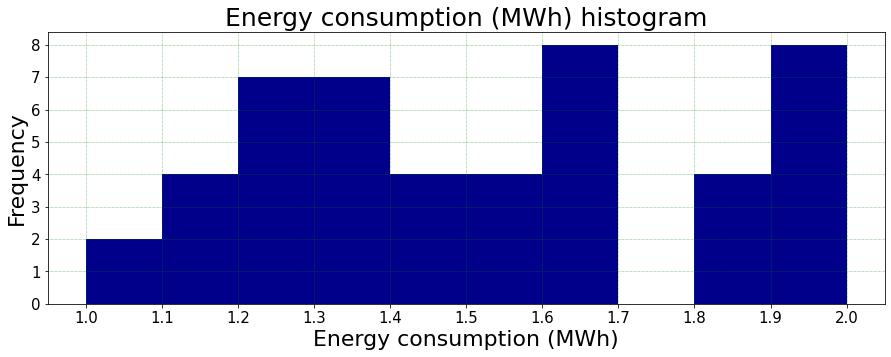

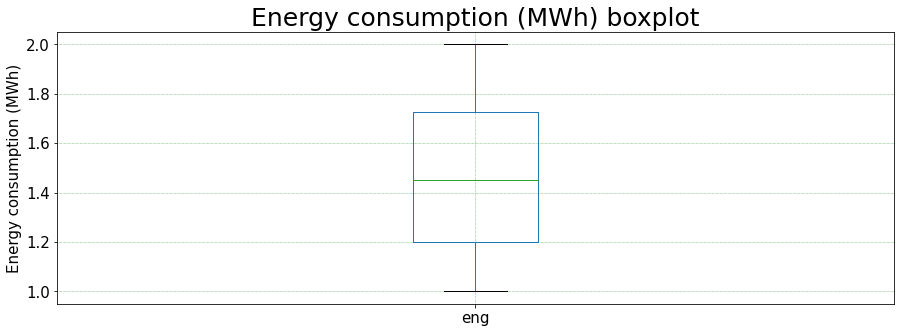

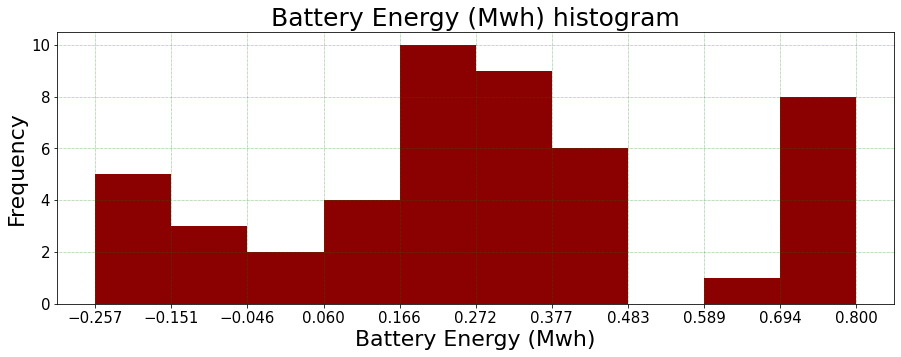

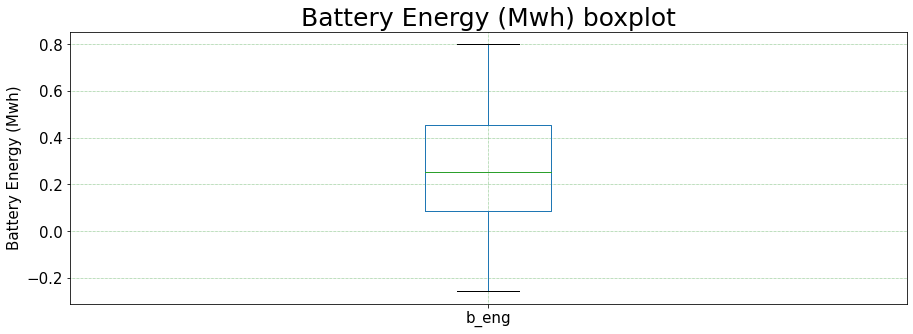

In [13]:
# Visualizing data histogram plot

b=10
e=1e-08

labelsize=15
figsize=(15,5)
titlefontsize=25
labelfontsize=22
blabelfontsize=15

 
    
for i, j, z in zip(df.columns , columns , Z) :
    plt.figure(figsize=(8,5))
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.title("{} histogram".format(j) , fontsize=titlefontsize) 
    df[i].plot.hist(bins=b, color=z ,figsize=figsize)
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel(j ,fontsize=labelfontsize)
    plt.ylabel("Frequency", fontsize=labelfontsize)
    F=(np.nanmax(df[i])-np.nanmin(df[i]))/b+e
    plt.xticks(np.arange(np.nanmin(df[i]), np.nanmax(df[i])+F, F))
    if i=='time':
        plt.xticks([0 , 1],["Night","Day"])
    plt.show()
    if i!='time':
        plt.rc('xtick',labelsize=labelsize)
        plt.rc('ytick',labelsize=labelsize)
        df.boxplot(column=i ,figsize=figsize)
        plt.title("{} boxplot".format(j) , fontsize=titlefontsize) 
        plt.ylabel(j,fontsize=blabelfontsize)
        plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
        plt.show() 


### 2-3 Data Cleaning

#### 2-3-1 Cheking out Duplicates

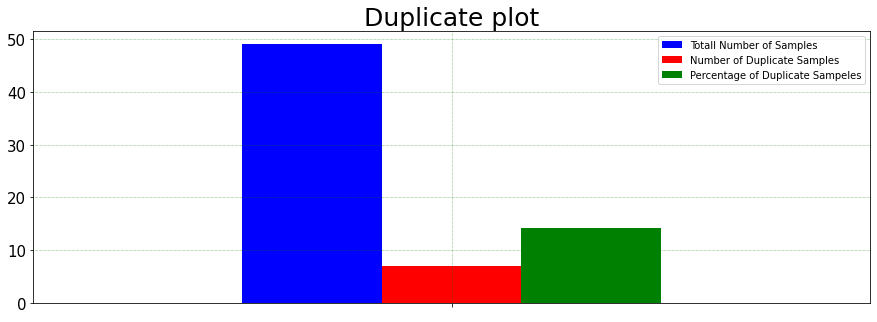

In [14]:
v=df.shape[0]

df=df.drop_duplicates(keep="first") 
df.reset_index(drop=True , inplace=True)
df.index.name= "NUM"

w=df.shape[0]

z=v-w

pz=(z/v)*100

c=pd.DataFrame({"Totall Number of Samples":v , 'Number of Duplicate Samples':z , "Percentage of Duplicate Sampeles":pz}
               , index=[" "])

c.plot.bar(color ={"blue":v, "red":z , "green":pz}, figsize=(15,5))
plt.title('Duplicate plot', fontsize=25)   
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()


#### 2-3-2 Checking out Missing Values

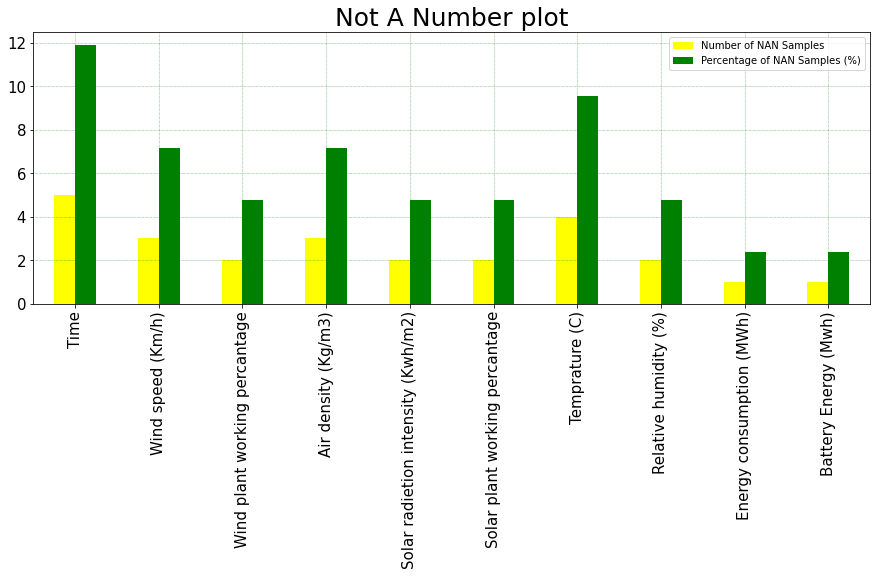

In [15]:
## counting the number of missing values

#NAN=data_df.isna().sum()
NAN=df.isnull().sum()
Total=df.count()+NAN
Percent=(NAN/Total)*100


T_N_df=pd.DataFrame({'Number of NAN Samples':NAN , "Percentage of NAN Samples (%)":Percent})


T_N_df.index=columns
T_N_df.plot.bar(color ={"yellow":NAN , "green":Percent }, figsize=(15,5))
plt.title('Not A Number plot', fontsize=25)
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

#### 2-3-3 Processing Missing Values

In [16]:
#dff=df.fillna(df.mean())


## Remoweing column or rows with more than half missing values
df=df.loc[df.count(1) > df.shape[1]/2, df.count(0) > df.shape[0]/2]


## Replacing missing values with the average of the real number before and after them
df1=df.fillna(method='ffill')
df1=df1.fillna(method='bfill')
df2=df.fillna(method='bfill')
df2=df2.fillna(method='ffill')
df=(df1+df2)/2

#In the situation that NAN in the "day" column is between day and night 
#according to this project we prefer to guess that it is night instead of day

df["time"]=df["time"].replace([0.5], [0])


#display(df1)
#display(df2)
#display(df)


#### 2-3-4 Checking out Outliers

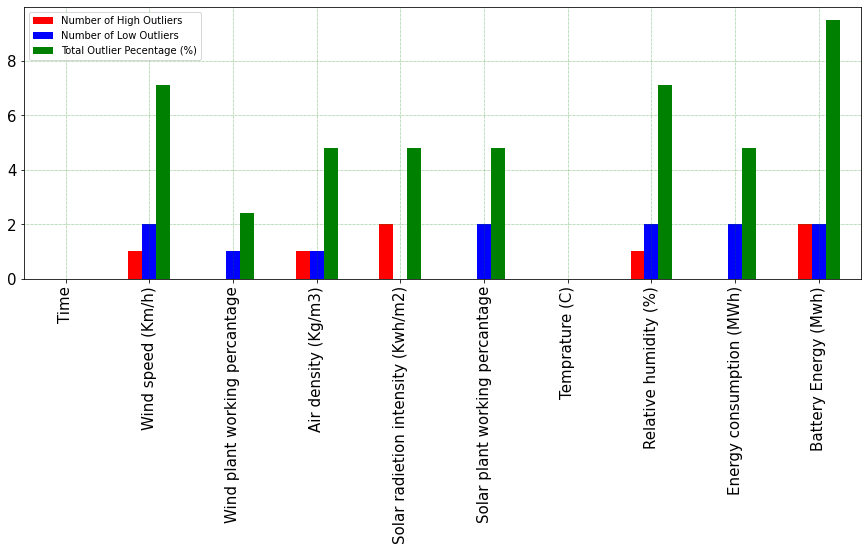

In [17]:
# finding values that are lower than 5 percentile and greater than 95 percentile as outliers

L=np.nanpercentile(df, 5, axis=0)
H=np.nanpercentile(df, 95, axis=0)


Hcount=df[df > H].count()
Lcount=df[df < L].count()

out_count=Hcount+Lcount
out_percent=(out_count/Total)*100

Hcount_df=pd.DataFrame({"Number of High Outliers":Hcount , "Number of Low Outliers":Lcount ,
                        'Total Outlier Pecentage (%)':out_percent})


Hcount_df=Hcount_df.round(1)
Hcount_df.index=columns

Hcount_df.plot.bar(color={"red":Hcount , "blue":Lcount , "green":out_percent}, figsize=(15,5))
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

#### 2-3-5 Processing Outliers

In [18]:
# replacing high outliers with the amount of 95 percentile and low outliers with the amount of 5 percentile

dff=pywt.threshold(df, L, 'greater', L) # bozorgtar az L ha ra negahdra baghi ra ba L jaygozin kon
dff=pywt.threshold(df, H, 'less', H)


dff=pd.DataFrame(dff)
dff.columns=df.columns
dff.index.name= "NUM"
dff=dff.round(2)


### 2-4 Feature Engineering

In [19]:
#Seperating features and the target to two table
x_raw=dff.drop('b_eng', axis=1,)
y=dff['b_eng']

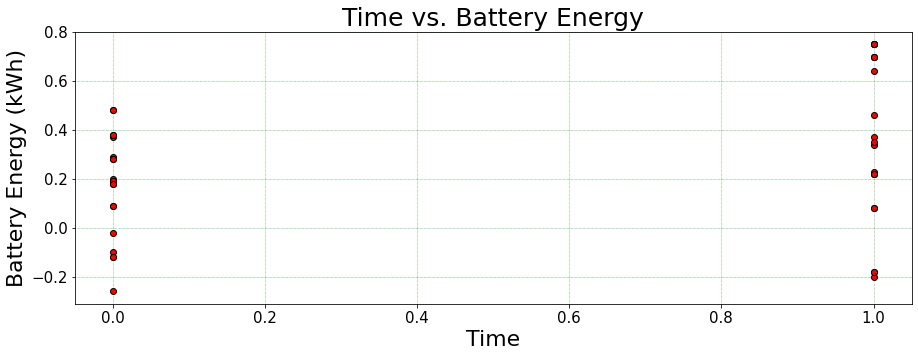

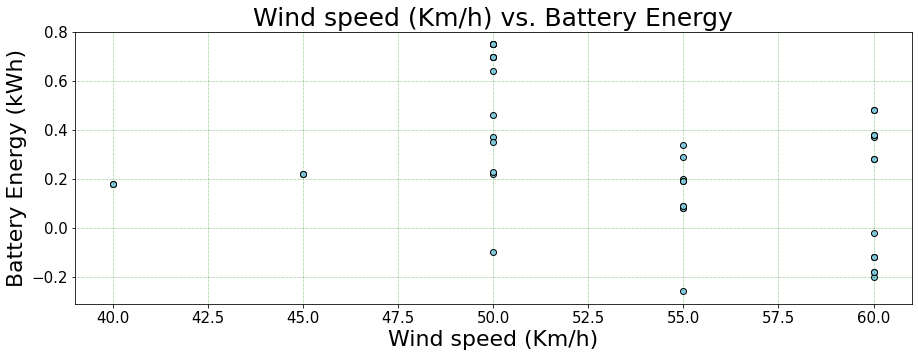

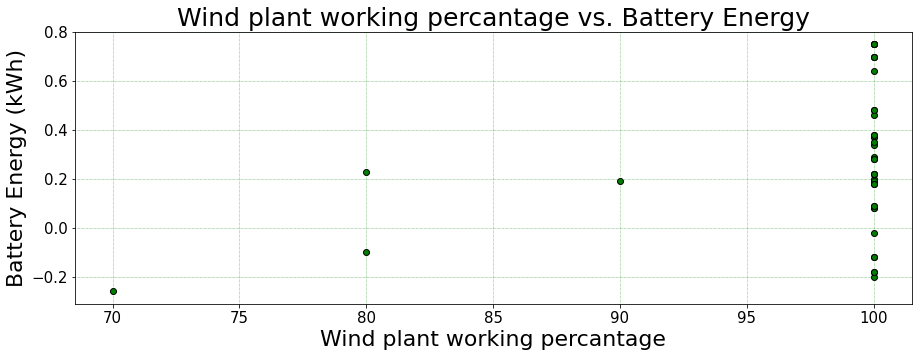

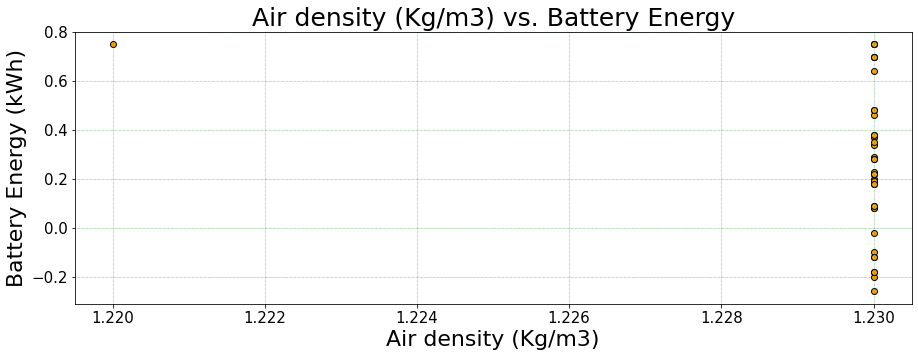

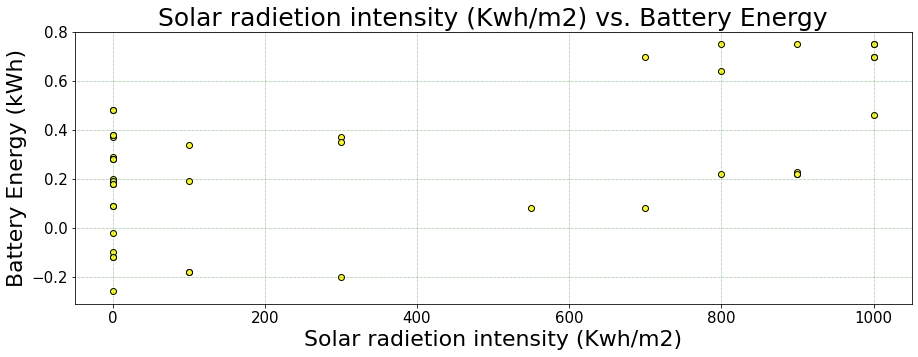

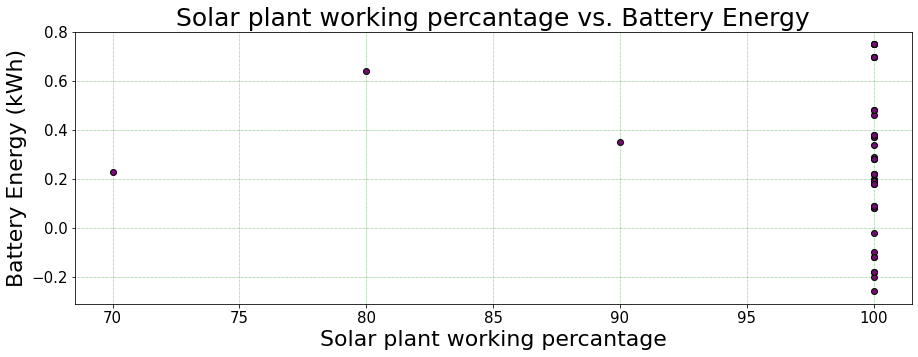

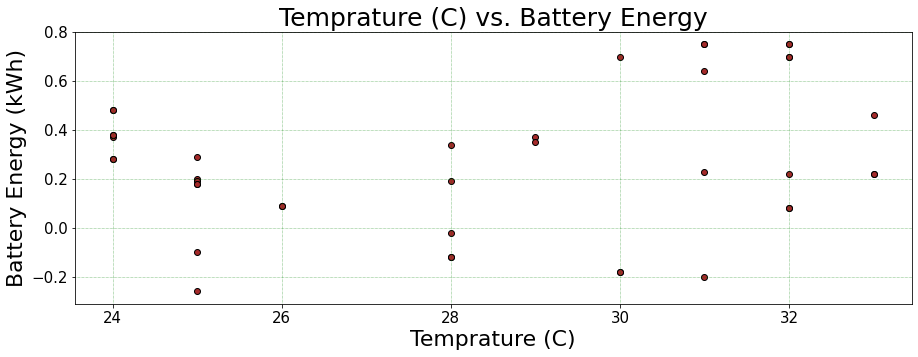

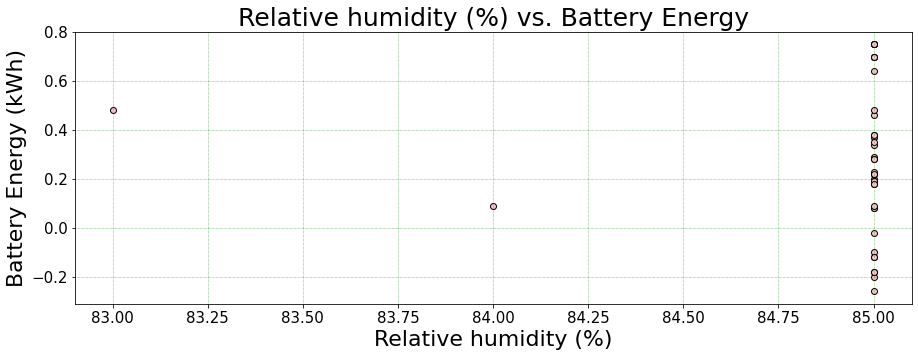

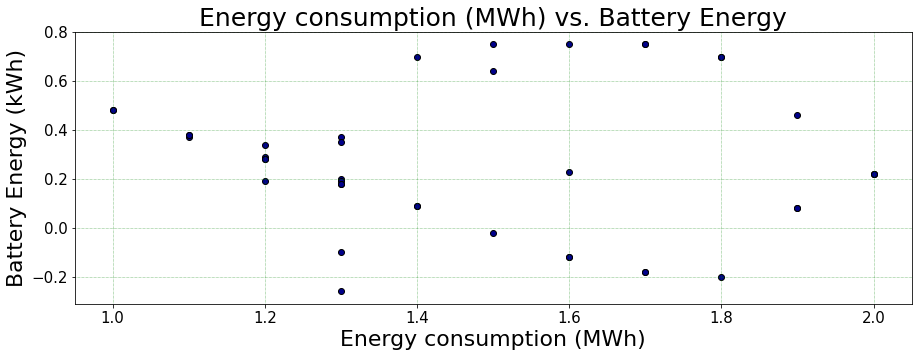

In [20]:
#Showing the relationship between the features and the target

x_plot=x_raw.copy()
x_plot.columns=columns9
# display(x_plot)
for i, j, z in zip(x_raw.columns , columns9 , Z) :
    plt.figure(figsize=figsize)
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.title("{} vs. Battery Energy".format(j) , fontsize=titlefontsize) 
    plt.scatter(x_raw[i], y ,color=z ,edgecolor='k')
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel(j ,fontsize=labelfontsize)
    plt.ylabel("Battery Energy (kWh)", fontsize=labelfontsize)
    plt.show()

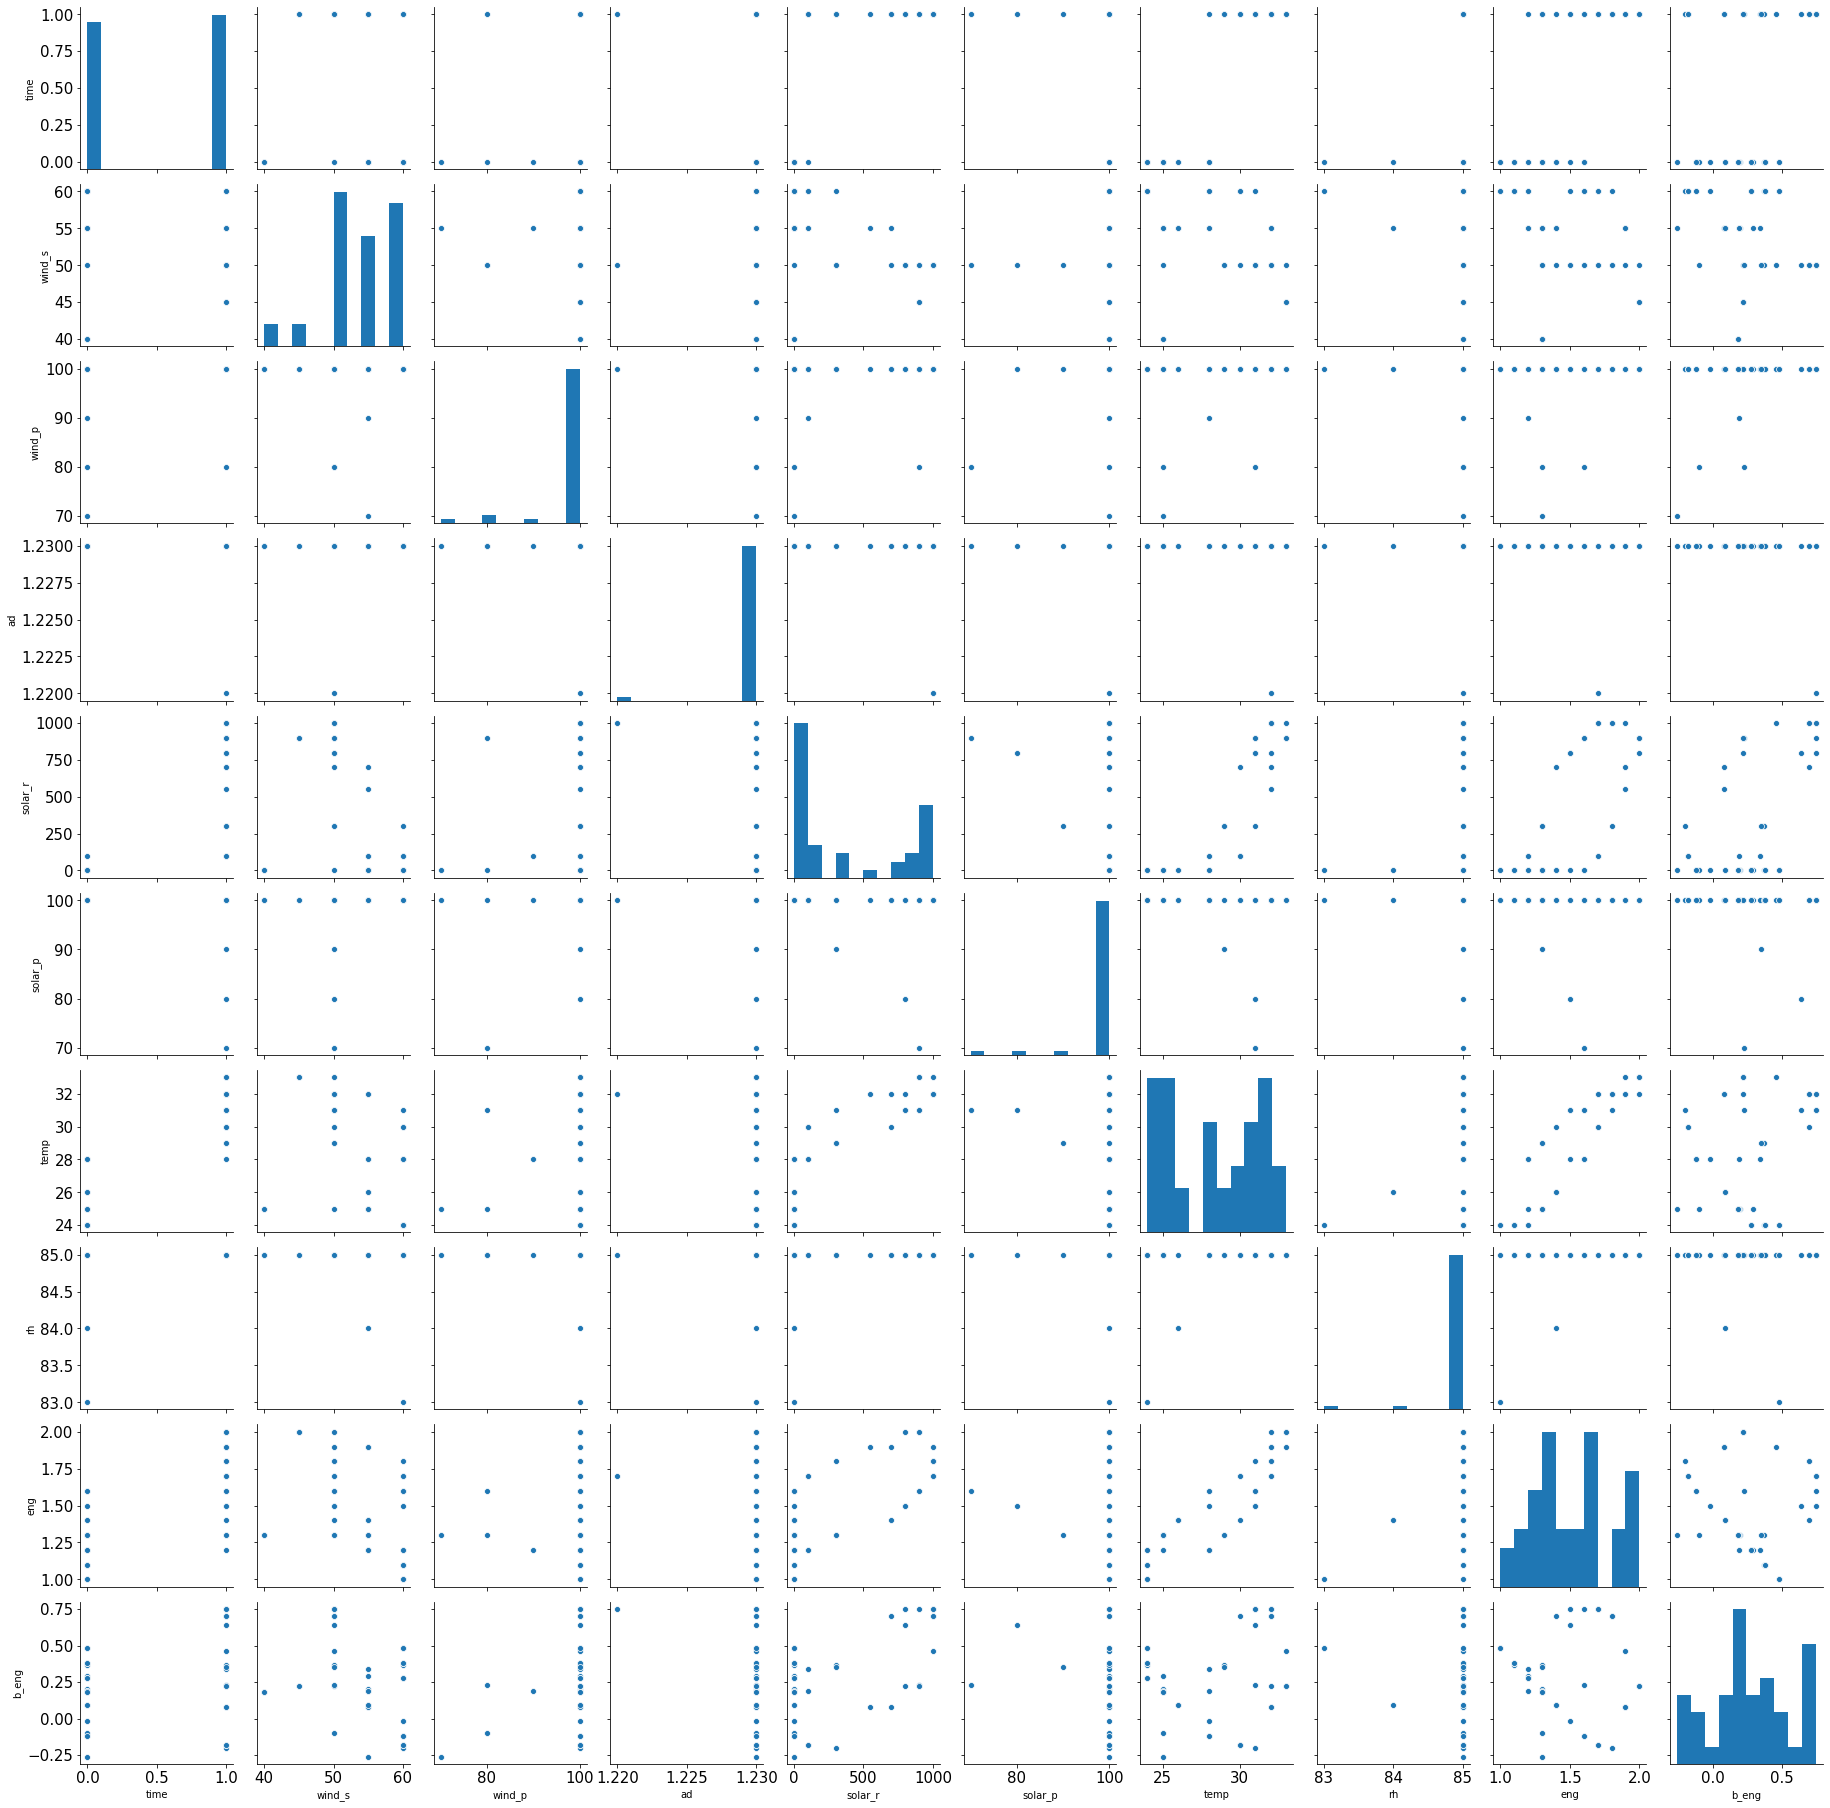

In [21]:
# Pairwise scatter plot
pairplot(dff)

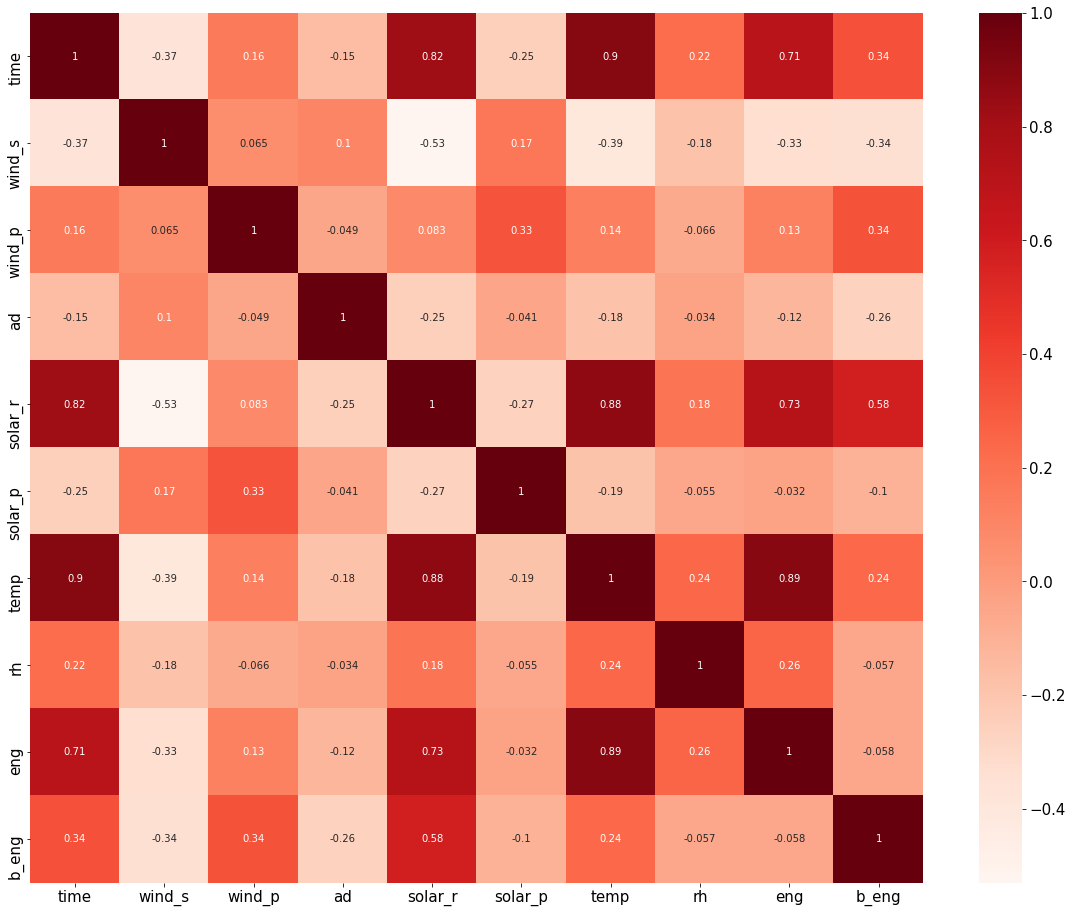

In [22]:
# Heatmap plot
plt.figure(figsize=(20,16))
plt.rc('xtick',labelsize=labelsize)
plt.rc('ytick',labelsize=labelsize)
cor = dff.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### 2-5 Feature Scaling

In [23]:
scaler = preprocessing.StandardScaler().fit(x_raw)
# scaler.mean_
# scaler.scale_
x=pd.DataFrame(scaler.transform(x_raw))
x.columns=x_raw.columns


### 2-6  Feature Selection

In [24]:
#Wrapper Method


sfs1 = sfs (estimator=LinearRegression(),  
           forward=False ,
           k_features="parsimonious")




sfs1 = sfs1.fit(x, y, custom_feature_names=columns9)


feat_cols = list(sfs1.k_feature_idx_)
feat_cols_names = list(sfs1.k_feature_names_)


print("Selcted Features are:")
print(feat_cols_names)
print("SFS score is= %f" % sfs1.k_score_)
x_sfs=x.iloc[:, feat_cols]


Selcted Features are:
['Time', 'Wind plant working percantage', 'Solar radietion intensity (Kwh/m2)', 'Energy consumption (MWh)']
SFS score is= 0.903085


In [25]:
#Embedded Methods



# Ridge
print("Ridge regression feature selection")
reg_R = RidgeCV(alphas=(0.01, 0.1 , 1 , 10))
reg_R.fit(x, y)
alpha_R=reg_R.alpha_
coef_R = pd.Series(reg_R.coef_, index = columns9)
print(*['Alpha =', alpha_R])
print(*['Score =', reg_R.score(x, y)])
print("Coefficients in Ridge regression are:")
display(coef_R)
print("-----------------------------------------------------------")

# Lasso
print("Lasso regression feature selection")
reg_LA = LassoCV(alphas=(0.01, 0.1 , 1 , 10) , cv=3)
reg_LA.fit(x, y)
alpha_LA=reg_LA.alpha_
coef_LA = pd.Series(reg_LA.coef_, index = columns9)
print(*['Alpha =', alpha_LA])
print(*['Score =', reg_LA.score(x, y)])
print("Coefficients in Lasso regression are:")
display(coef_LA)
print("-----------------------------------------------------------")

# ElasticNet

print("ElasticNet regression feature selection")
reg_E =  ElasticNetCV(alphas=(0.01, 0.1 , 1 , 10) , cv=3)
reg_E.fit(x, y)
alpha_E=reg_E.alpha_
coef_E = pd.Series(reg_E.coef_, index = columns9)
print(*['Alpha =', alpha_E])
print(*['Score =', reg_E.score(x, y)])
print("Coefficients in ElasticNet regression are:")
display(coef_E)


Ridge regression feature selection
Alpha = 0.1
Score = 0.9801418364137156
Coefficients in Ridge regression are:


Time                                 -0.030186
Wind speed (Km/h)                     0.001188
Wind plant working percantage         0.095739
Air density (Kg/m3)                  -0.005576
Solar radietion intensity (Kwh/m2)    0.426953
Solar plant working percantage        0.031022
Temprature (C)                       -0.021746
Relative humidity (%)                 0.001645
Energy consumption (MWh)             -0.298017
dtype: float64

-----------------------------------------------------------
Lasso regression feature selection
Alpha = 0.01
Score = 0.9604625710072476
Coefficients in Lasso regression are:


Time                                 -0.000000
Wind speed (Km/h)                    -0.000000
Wind plant working percantage         0.085590
Air density (Kg/m3)                  -0.003271
Solar radietion intensity (Kwh/m2)    0.356512
Solar plant working percantage        0.018292
Temprature (C)                       -0.000000
Relative humidity (%)                -0.000000
Energy consumption (MWh)             -0.276975
dtype: float64

-----------------------------------------------------------
ElasticNet regression feature selection
Alpha = 0.01
Score = 0.9719145547979313
Coefficients in ElasticNet regression are:


Time                                 -0.013773
Wind speed (Km/h)                    -0.000000
Wind plant working percantage         0.089852
Air density (Kg/m3)                  -0.005363
Solar radietion intensity (Kwh/m2)    0.379932
Solar plant working percantage        0.024073
Temprature (C)                       -0.000000
Relative humidity (%)                -0.000000
Energy consumption (MWh)             -0.288469
dtype: float64

In [26]:
# showing which features have been selected by which method

coef_RC=coef_R.copy()
coef_LAC=coef_LA.copy()
coef_EC=coef_E.copy()

coef=pd.DataFrame({"Ridge regrassion": coef_RC , "Lasso regrassion": coef_LAC , "ElasticNet regrassion": coef_EC})  

columns=pd.DataFrame(columns9).copy()


xx=x.iloc[0,:].copy()
xx= pd.Series(xx, index = columns9)

xx=pd.DataFrame({"SFS (Used in Linear, ANN and XGboost)":xx})
xx.iloc[:,0]="⨉"
xx.iloc[feat_cols,:]="✔"


coef_C=coef.copy()
coef_C["SFS (Used in Linear, ANN and XGboost)"]=xx
z=-1
for i , j , k in zip(coef["Ridge regrassion"] , coef["Lasso regrassion"] , coef ["ElasticNet regrassion"]) :
    z=z+1
    u=columns.iloc[z , 0]
    if i==0 :
        coef_C.loc[u , "Ridge regrassion"]="⨉"
    else:
        coef_C.loc[u , "Ridge regrassion"]="✔"
    if j==0 :
        coef_C.loc[u , "Lasso regrassion"]="⨉"
    else:
        coef_C.loc[u , "Lasso regrassion"]="✔"
    if k==0 :
        coef_C.loc[u , "ElasticNet regrassion"]="⨉"
    else:
        coef_C.loc[u , "ElasticNet regrassion"]="✔"

display(coef_C)


,Ridge regrassion,Lasso regrassion,ElasticNet regrassion,"SFS (Used in Linear, ANN and XGboost)"
Time,✔,⨉,✔,✔
Wind speed (Km/h),✔,⨉,⨉,⨉
Wind plant working percantage,✔,✔,✔,✔
Air density (Kg/m3),✔,✔,✔,⨉
Solar radietion intensity (Kwh/m2),✔,✔,✔,✔
Solar plant working percantage,✔,✔,✔,⨉
Temprature (C),✔,⨉,⨉,⨉
Relative humidity (%),✔,⨉,⨉,⨉
Energy consumption (MWh),✔,✔,✔,✔


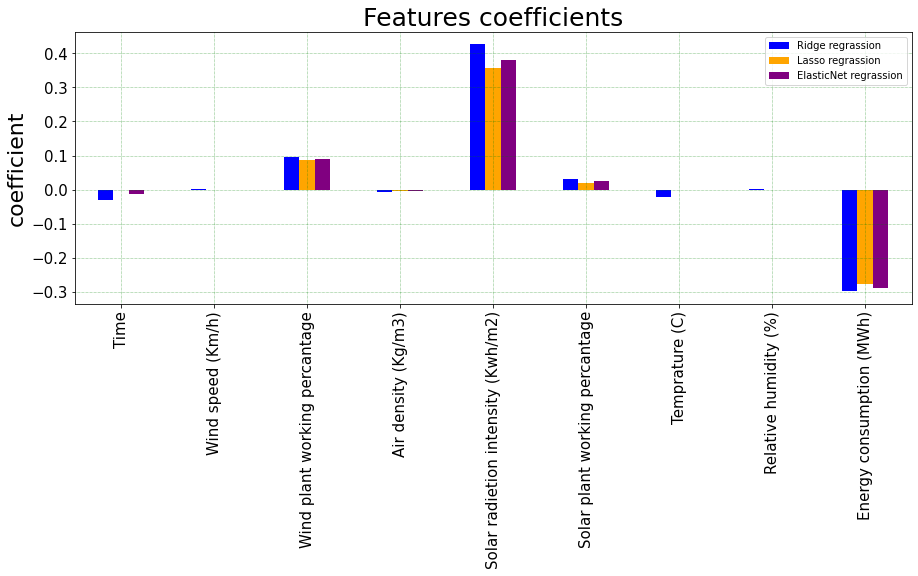

In [27]:
# plotting features coefficients

coef.plot.bar(color={ "blue":"Ridge regression" ,
                              "orange":"Lasso regression" , "purple":"ElasticNet regression" },
                       figsize=figsize)
plt.title('Features coefficients', fontsize=titlefontsize)   
plt.ylabel('coefficient', fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

## 3- Model Selection

### 3-1 Evaluation Methods

In [28]:
 
seed = 7
test_size = 0.2

x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=test_size, random_state=seed)

x_train_sfs, x_test_sfs, y_train_sfs , y_test_sfs = model_selection.train_test_split(x_sfs, y, test_size=test_size, random_state=seed)


In [29]:

kfold = model_selection.KFold(n_splits=3 , random_state=seed, shuffle=False)

C:\Users\HosseinSLT\Anaconda3\envs\tfp\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### 3-2  Regression Methods


#### 3-2-1 Linear Regression


In [30]:

L = LinearRegression()

In [31]:
L.fit(x_train_sfs, y_train_sfs)
result_LT = L.score(x_test_sfs, y_test_sfs)
y_pred_LT=L.predict(x_test_sfs)

print("Accuracy: %.3f%%" % (result_LT*100.0))

Accuracy: 97.411%


In [32]:
L.fit(x_sfs, y)
results_LK = model_selection.cross_val_score(L, x_sfs, y, cv=kfold)
y_pred_LK=L.predict(x_sfs)
errors_LK=y_pred_LK-y


# model.fit(x, y)
# results_LK = model_selection.cross_val_score(L, x, y, cv=kfold)
# y_pred_LK=L.predict(x)

print("Accuracy: %.3f%% (%.3f%%)" % (results_LK.mean()*100.0, results_LK.std()*100.0))
print (results_LK)

Accuracy: 93.219% (2.116%)
[0.91002619 0.96068999 0.92584636]


#### 3-2-2 Ridge Regression

In [33]:
R = Ridge(alpha=alpha_R)

In [34]:
R.fit(x_train, y_train)
result_RT = R.score(x_test, y_test)
y_pred_RT=R.predict(x_test)
print("Accuracy: %.3f%%" % (result_RT*100.0))

Accuracy: 98.171%


In [35]:
R.fit(x, y)
results_RK = model_selection.cross_val_score(R, x, y, cv=kfold)
y_pred_RK=R.predict(x)
errors_RK=y_pred_RK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_RK.mean()*100.0, results_RK.std()*100.0))
print (results_RK)

Accuracy: 94.846% (1.279%)
[0.95130301 0.96251888 0.9315709 ]


#### 3-2-3 Lasso Regression

In [36]:
LA = Lasso (alpha=alpha_LA)

In [37]:
LA.fit(x_train, y_train)
result_LAT = LA.score(x_test, y_test)
y_pred_LAT=LA.predict(x_test)
print("Accuracy: %.3f%%" % (result_LAT*100.0))

Accuracy: 95.330%


In [38]:
LA.fit(x, y)
results_LAK = model_selection.cross_val_score(LA, x, y, cv=kfold)
y_pred_LAK=LA.predict(x)
errors_LAK=y_pred_LAK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_LAK.mean()*100.0, results_LAK.std()*100.0))
print (results_LAK)

Accuracy: 87.231% (2.625%)
[0.84083379 0.90508992 0.87100766]


#### 3-2-4 ElasticNet Regression

In [39]:
E = ElasticNet(alpha =alpha_E)

In [40]:
E.fit(x_train, y_train)
result_ET = E.score(x_test, y_test)
y_pred_ET=E.predict(x_test)
print("Accuracy: %.3f%%" % (result_ET*100.0))


Accuracy: 96.420%


In [41]:
E.fit(x, y)
results_EK = model_selection.cross_val_score(E, x, y, cv=kfold)
y_pred_EK=E.predict(x)
errors_EK=y_pred_EK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_EK.mean()*100.0, results_EK.std()*100.0))
print (results_EK)

Accuracy: 91.678% (1.781%)
[0.90296492 0.94191997 0.90544527]


#### 3-2-5 Artificial Neural Network


In [42]:
def build_model():
  ANN = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(x_sfs.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  ANN.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return ANN

EPOCHS = 1000

ANN = KerasRegressor(build_fn=build_model, epochs=EPOCHS, batch_size=5, verbose=0)

results = cross_val_score(ANN, x_sfs, y, cv=kfold)
print("Baseline: %.4f (%.4f) MSE" % (results.mean(), results.std()))


ANN.fit(
  x_sfs, y,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

y_pred_ANNK = ANN.predict(x_sfs).flatten()
errors_ANNK=y_pred_ANNK-y

Baseline: -0.0045 (0.0005) MSE

Epoch: 0, loss:0.1004,  mae:0.2777,  mse:0.1004,  val_loss:0.0354,  val_mae:0.1615,  val_mse:0.0354,  
....................................................................................................
Epoch: 100, loss:0.0007,  mae:0.0193,  mse:0.0007,  val_loss:0.0051,  val_mae:0.0448,  val_mse:0.0051,  
....................................................................................................
Epoch: 200, loss:0.0005,  mae:0.0137,  mse:0.0005,  val_loss:0.0048,  val_mae:0.0422,  val_mse:0.0048,  
....................................................................................................
Epoch: 300, loss:0.0004,  mae:0.0149,  mse:0.0004,  val_loss:0.0044,  val_mae:0.0375,  val_mse:0.0044,  
....................................................................................................
Epoch: 400, loss:0.0005,  mae:0.0153,  mse:0.0005,  val_loss:0.0026,  val_mae:0.0297,  val_mse:0.0026,  
.........................................

#### 3-2-5 XGboost

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, learning_rate = 0.2,
                max_depth = 2 , n_estimators = 100)
xg_reg.fit(x_sfs, y)
results_XK = model_selection.cross_val_score(xg_reg, x_sfs, y, cv=kfold)
y_pred_XK=xg_reg.predict(x_sfs)
errors_XK=y_pred_XK-y
print("Accuracy: %.3f%% (%.3f%%)" % (results_XK.mean()*100.0, results_XK.std()*100.0))
print (results_XK)

Accuracy: 76.522% (11.561%)
[0.60442365 0.87127831 0.81996053]


In [44]:

predicted=pd.DataFrame({"Linear Regression predicted values": y_pred_LK ,"Ridge Regression predicted values" : y_pred_RK,
                       "Lasso Regression predicted values": y_pred_LAK ,"ElasticNet Regression predicted values" : y_pred_EK,
                     "Artificial Neural Network predicted values": y_pred_ANNK , "XGBRegressor predicted values": y_pred_XK})

errors=pd.DataFrame({"Linear Regression errors": errors_LK ,"Ridge Regression errors" : errors_RK,
                       "Lasso Regression errors": errors_LAK ,"ElasticNet Regression errors" : errors_EK,
                    "Artificial Neural Network errors": errors_ANNK, "XGBRegressor errors": errors_XK})

AC=pd.DataFrame({"Accuracy (%) ":(results_LK.mean()*100.0 , results_RK.mean()*100.0 ,results_LAK.mean()*100.0 , results_EK.mean()*100.0 ,results_XK.mean()*100.0)}
               , index=("Linear Regression", "Ridge Regression" , "Lasso Regression" ,"ElasticNet Regression" , "XGBRegressor" ))

## 4- Results and Errors

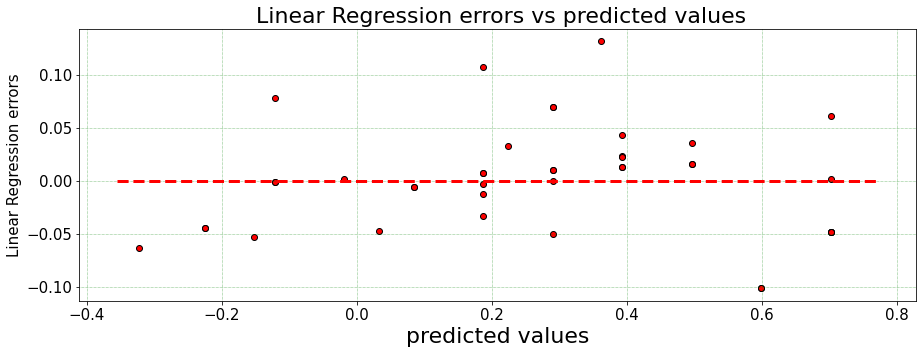

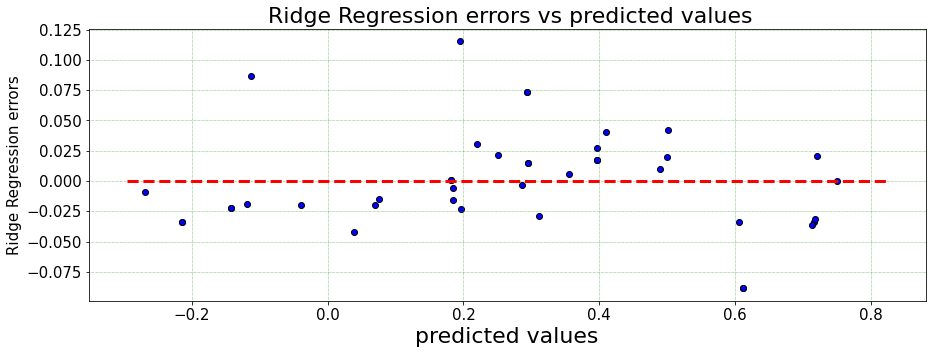

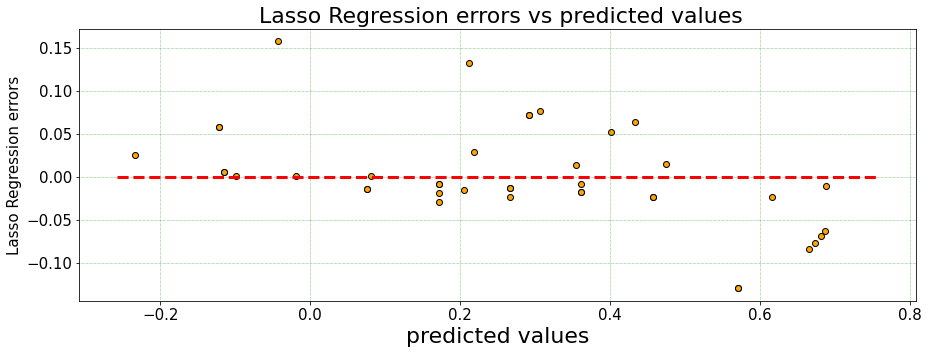

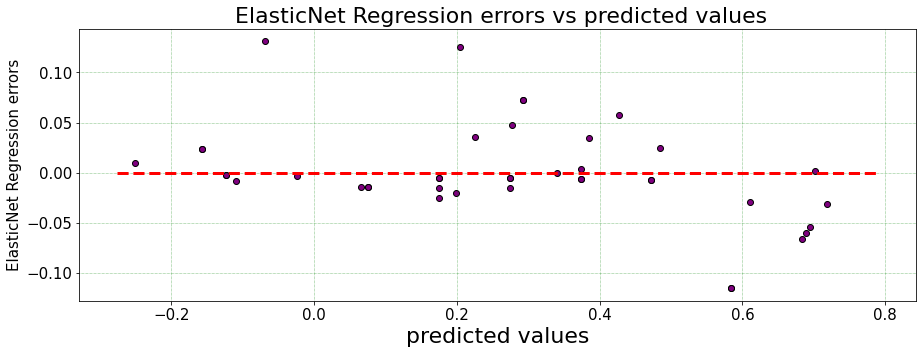

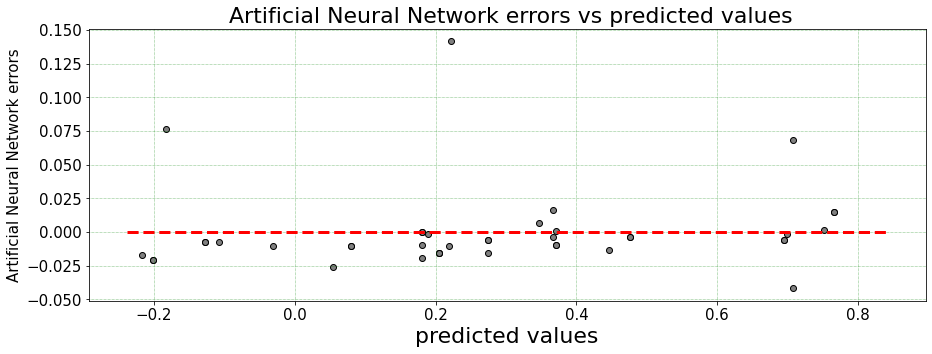

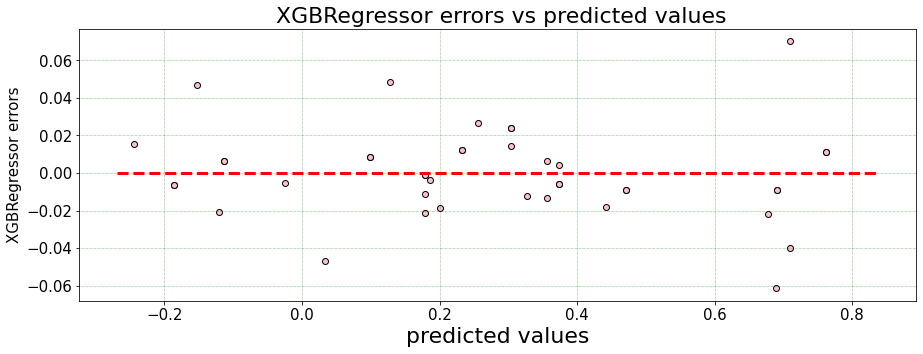

In [45]:
#plotting regression methods errors and predicted values
colors=["red"]+["blue"]+["orange"]+["purple"]+["gray"]+["pink"]

for i, j ,z in zip(predicted.columns, errors.columns , colors) :
    plt.figure(figsize=figsize)
    plt.title(" {} vs predicted values".format(j) , fontsize=22) 
    plt.scatter(x=predicted[i] , y=errors[j] ,color=z ,edgecolor='k')
    plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
    plt.xlabel("predicted values" ,fontsize=labelfontsize)
    plt.ylabel(j, fontsize=blabelfontsize)
    xmin=min(predicted[i])
    xmax =max(predicted[i])
    plt.hlines(y=0,xmin=xmin*1.1,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.show()

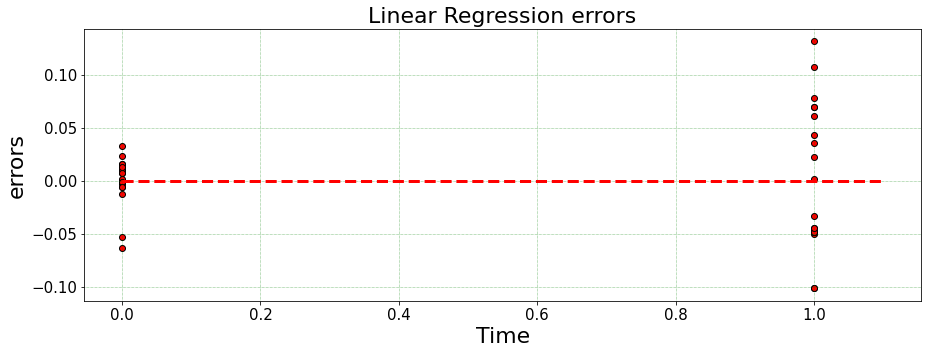

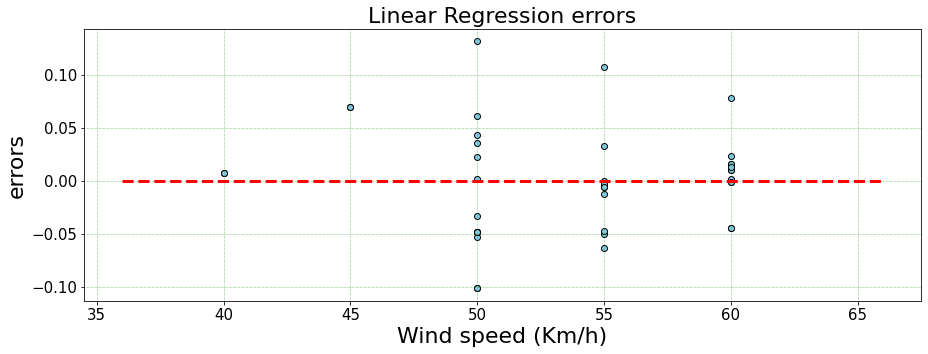

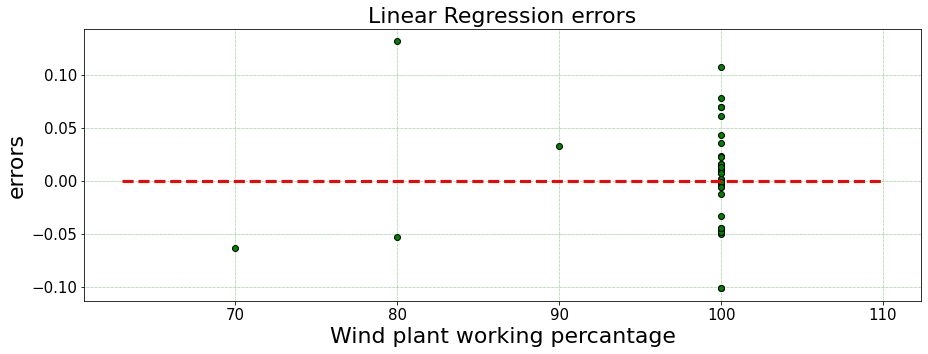

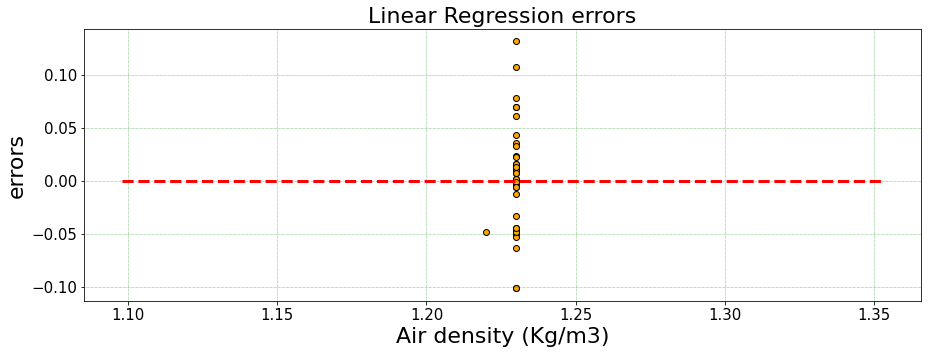

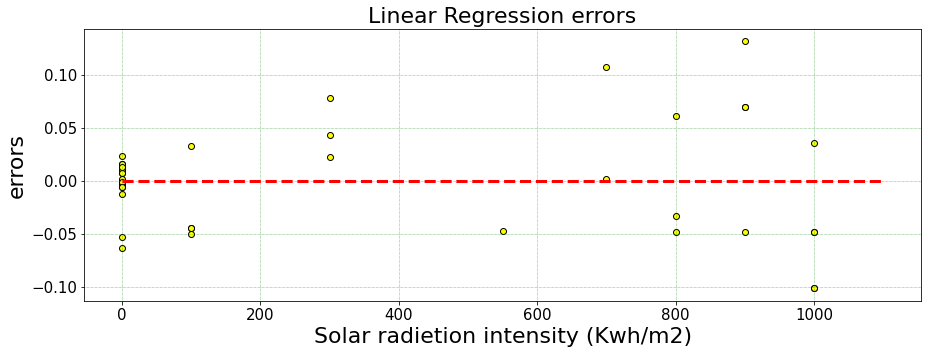

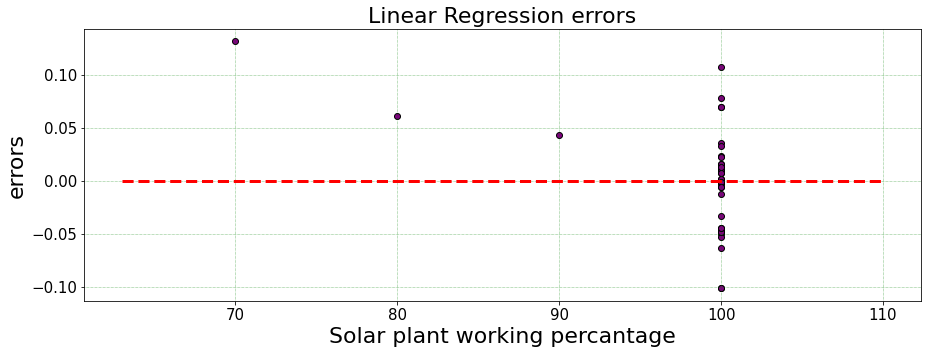

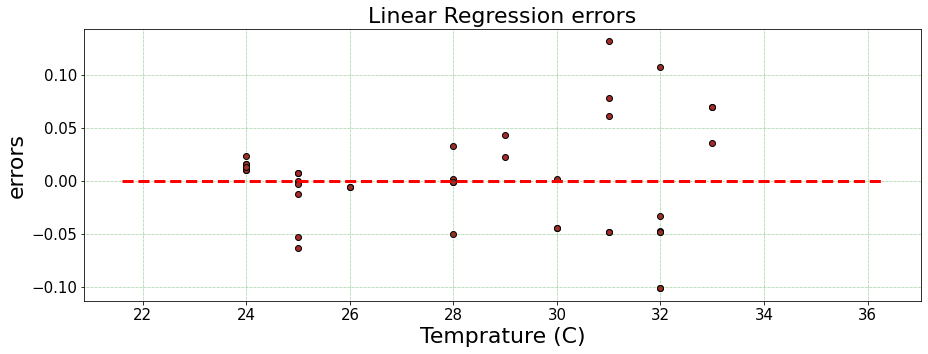

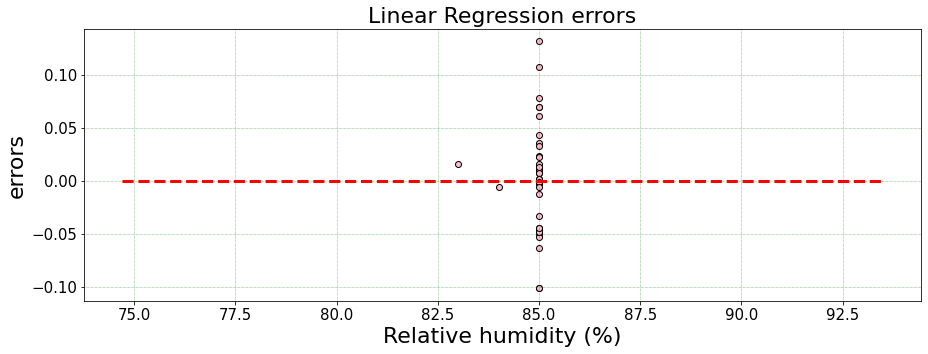

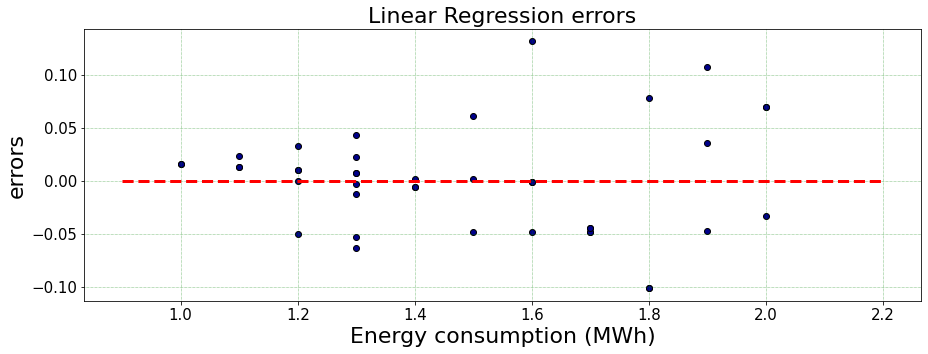

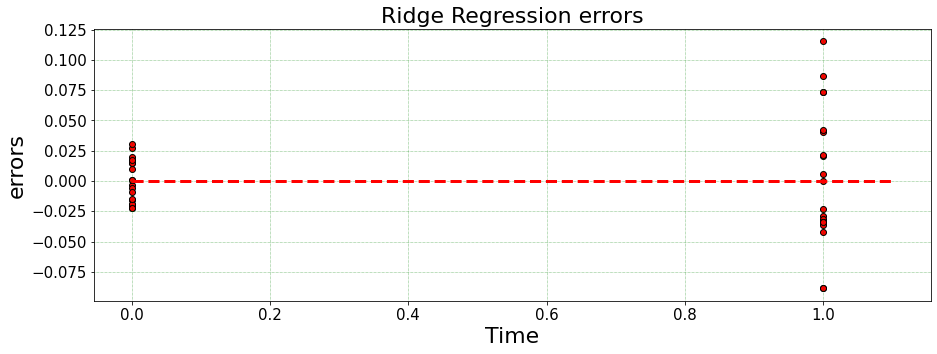

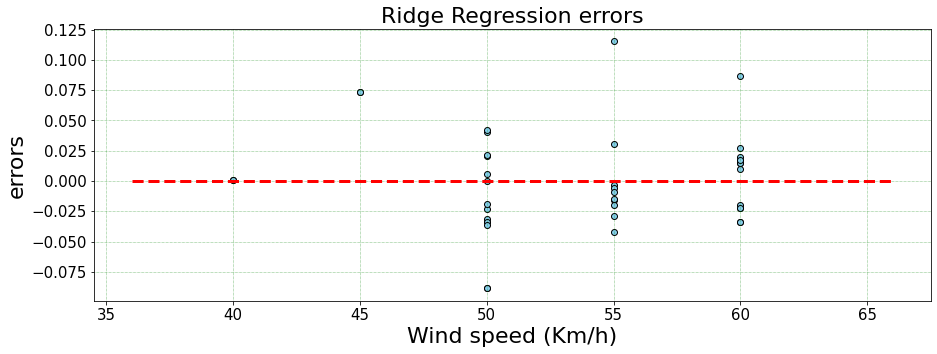

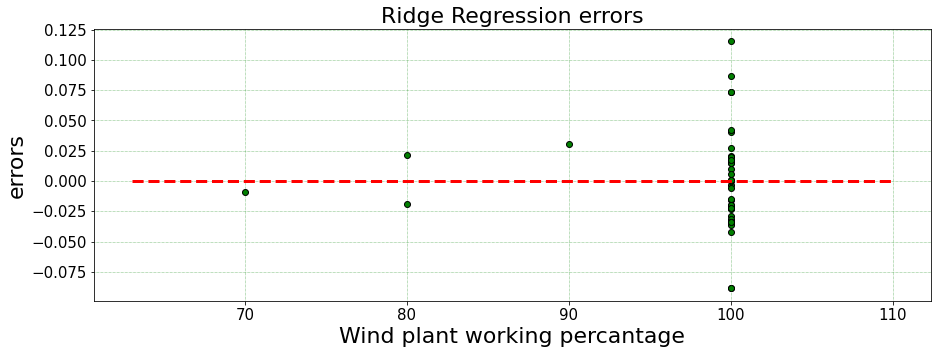

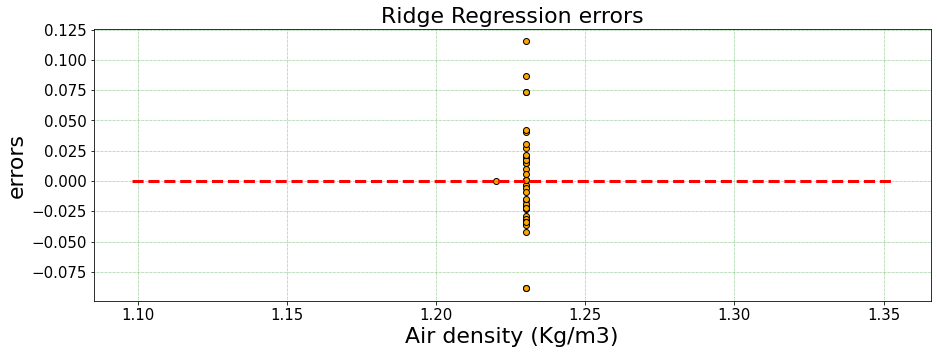

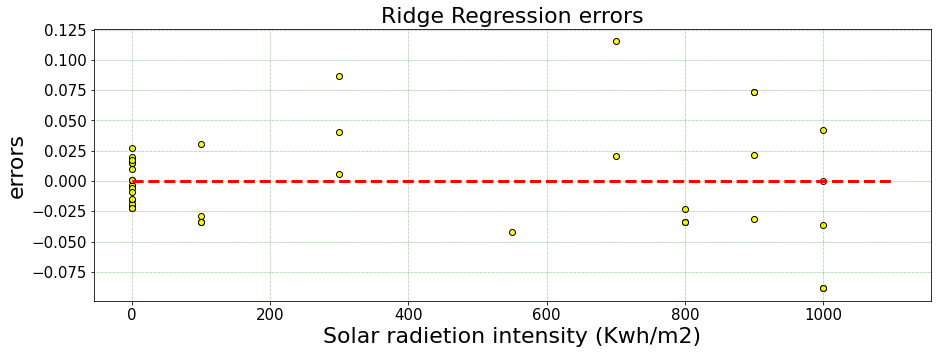

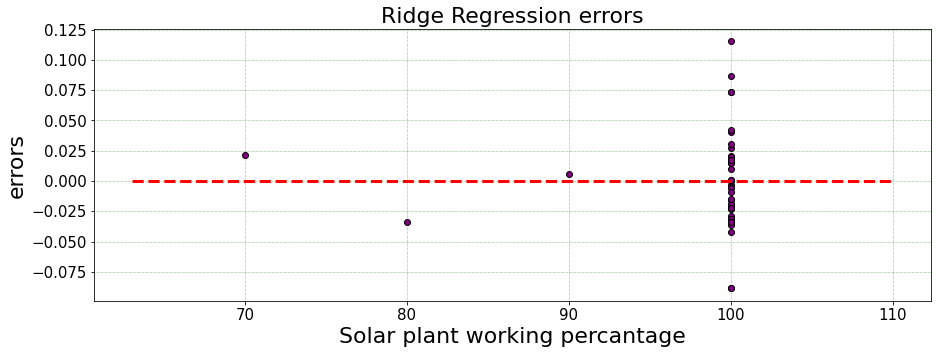

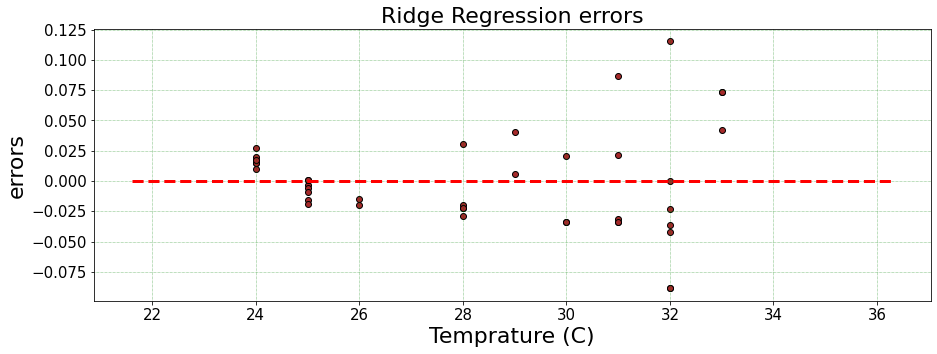

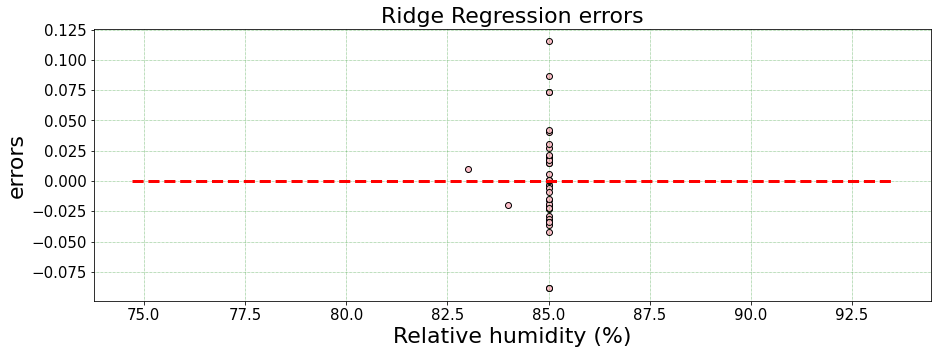

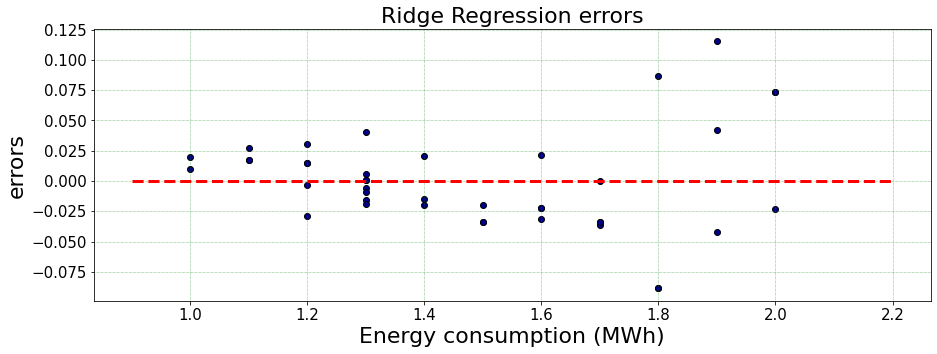

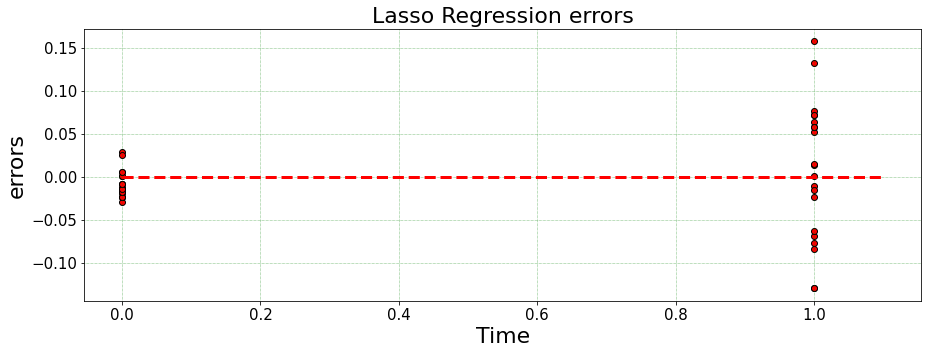

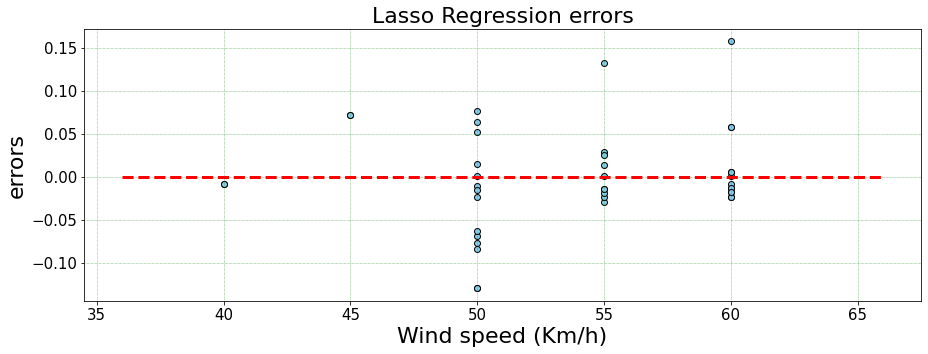

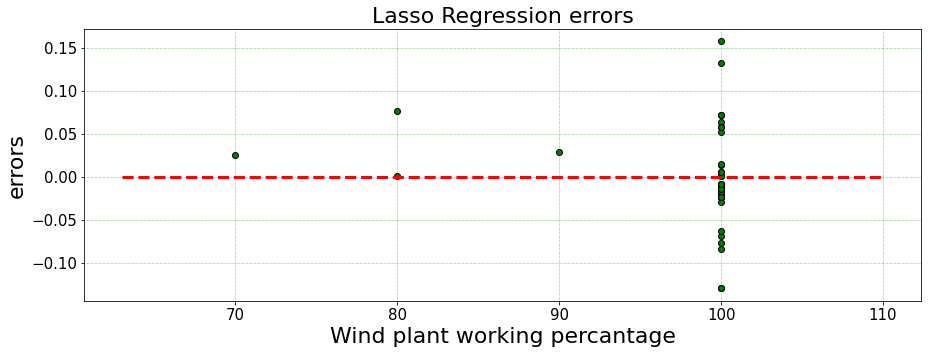

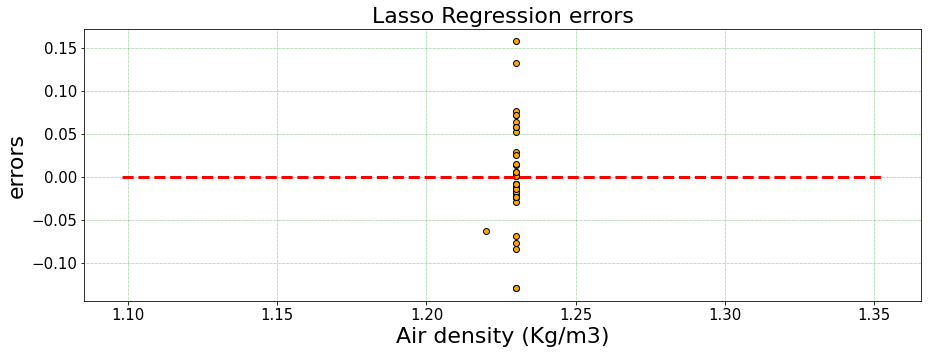

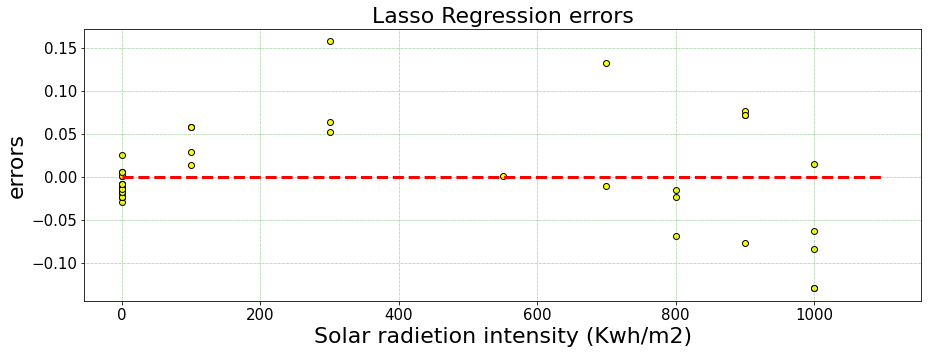

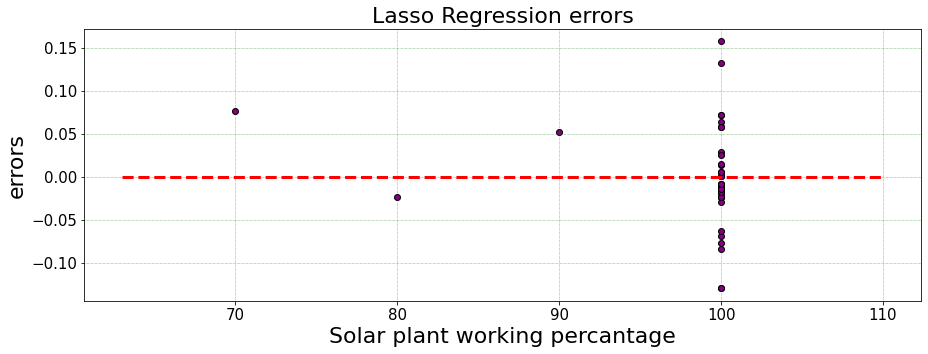

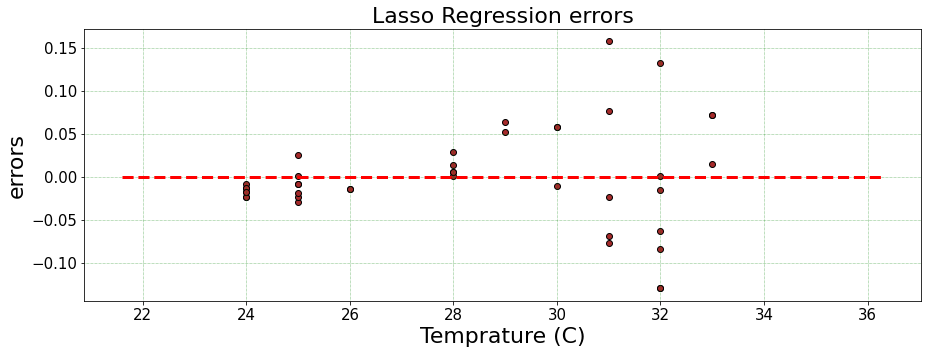

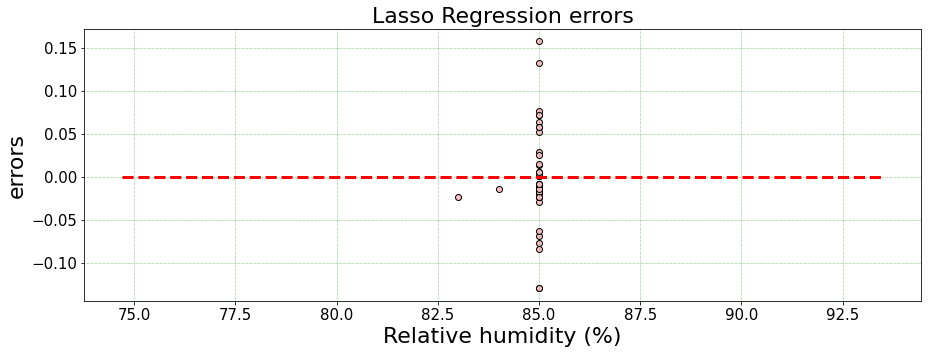

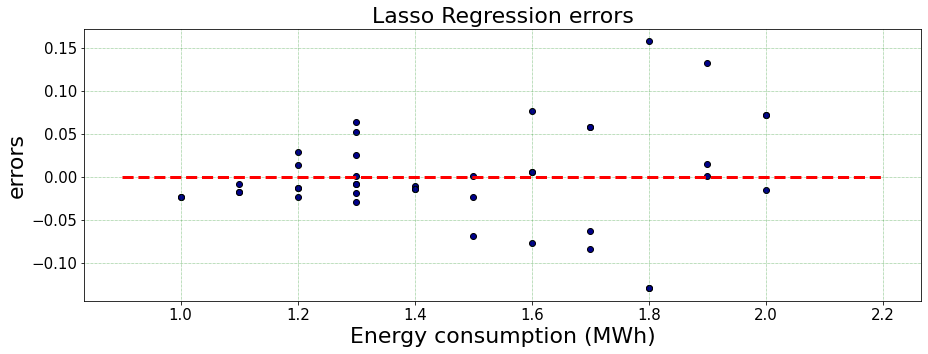

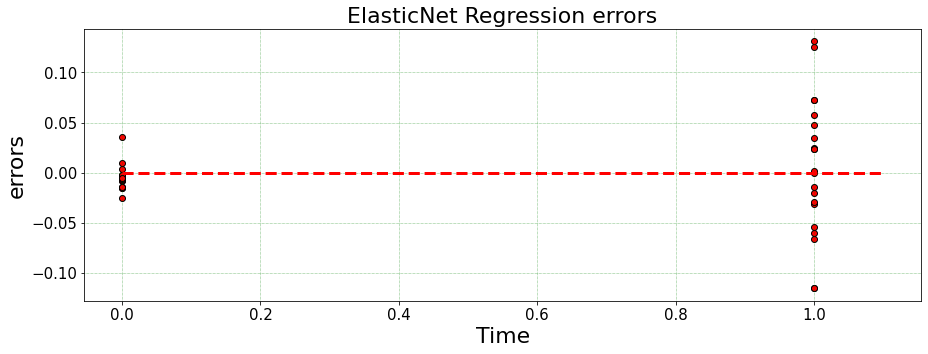

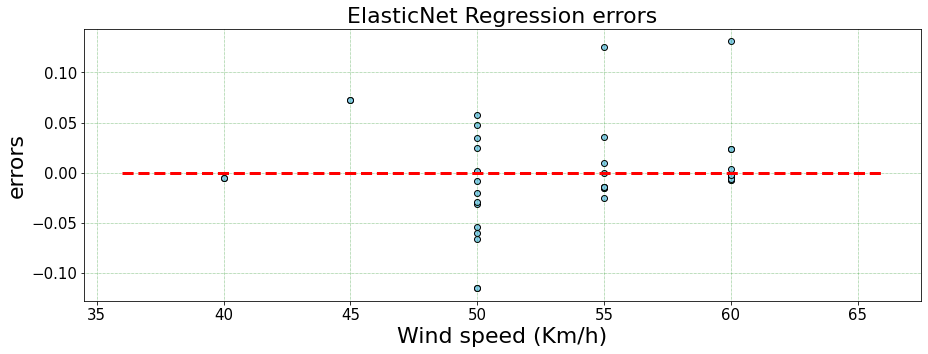

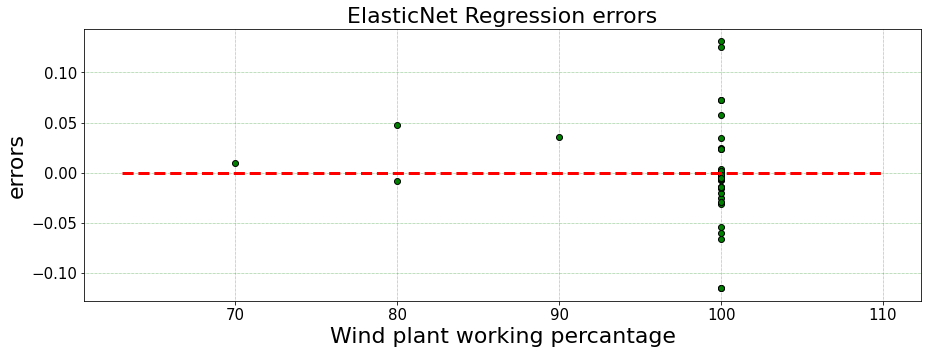

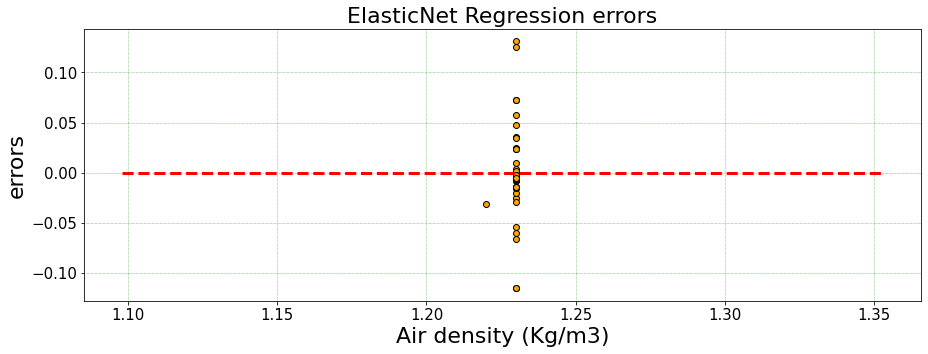

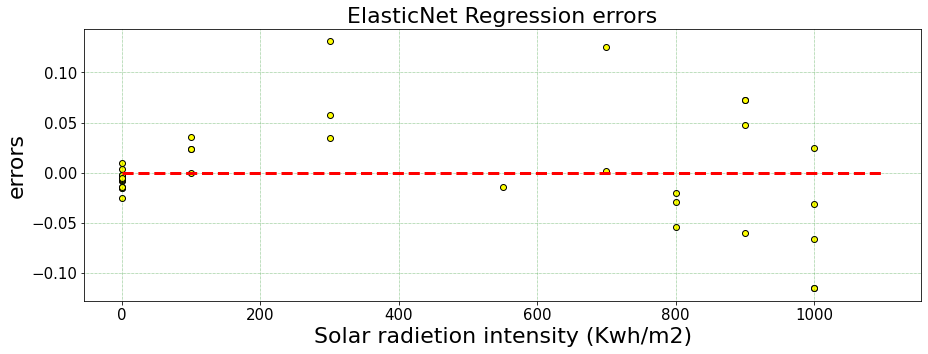

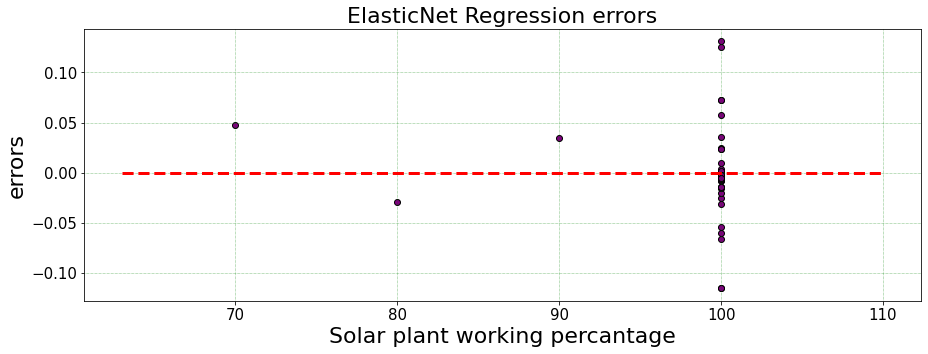

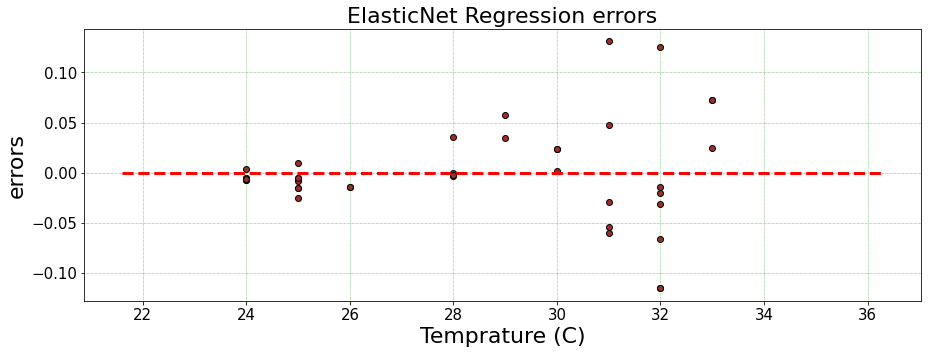

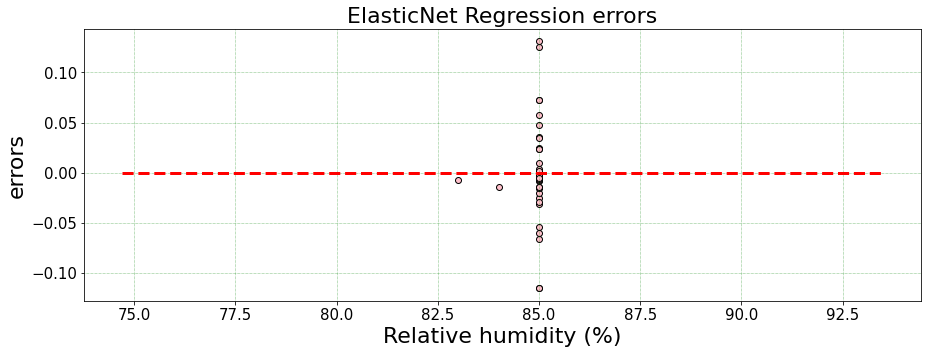

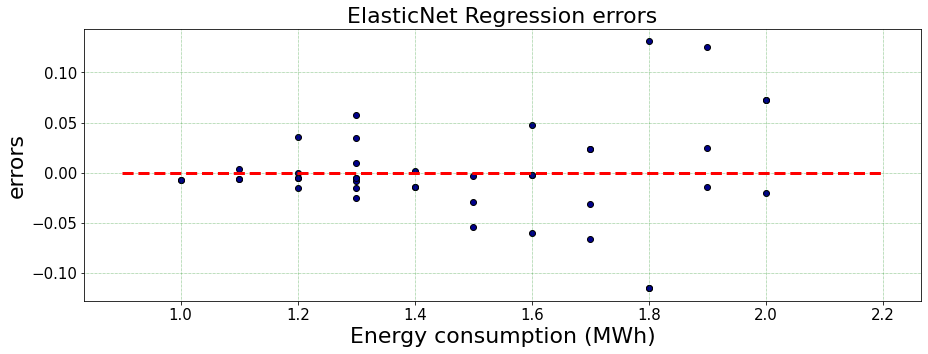

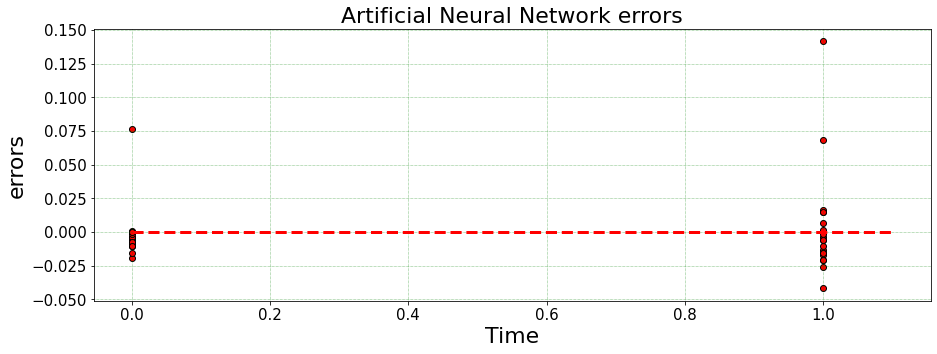

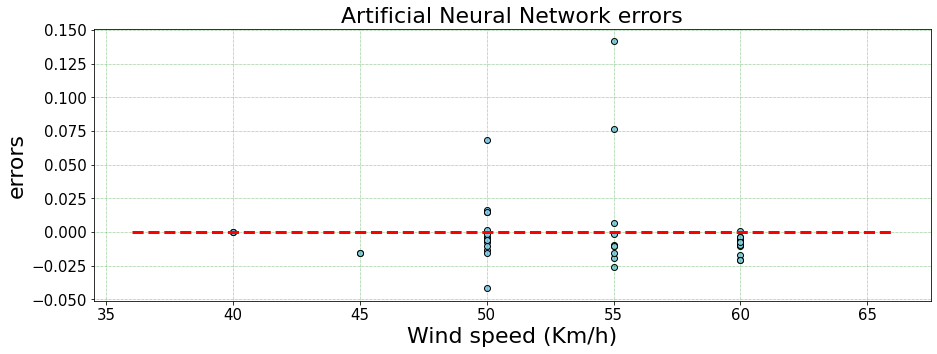

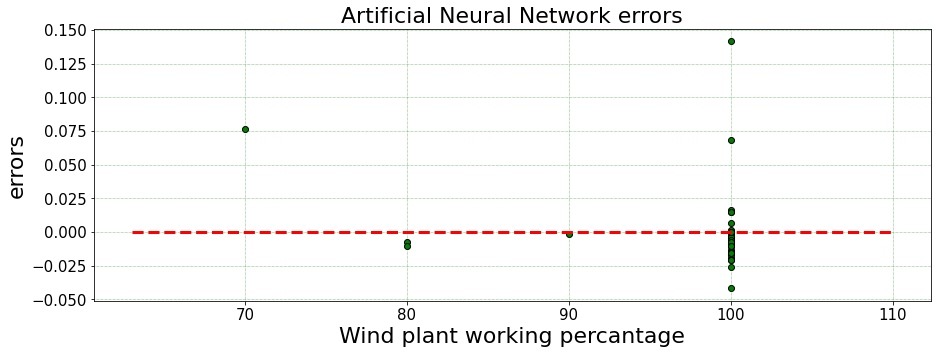

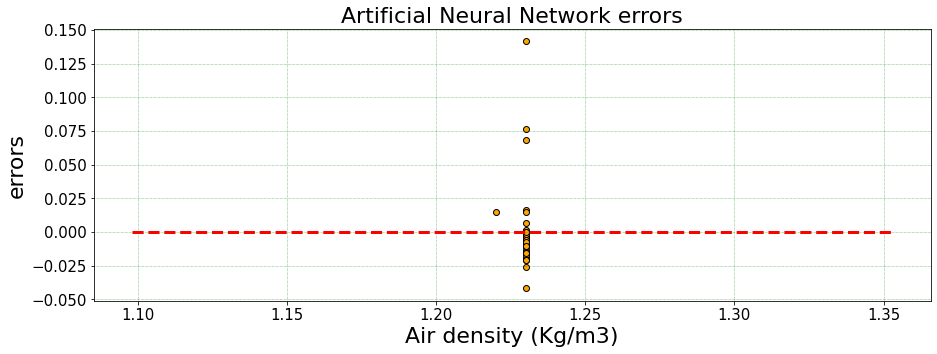

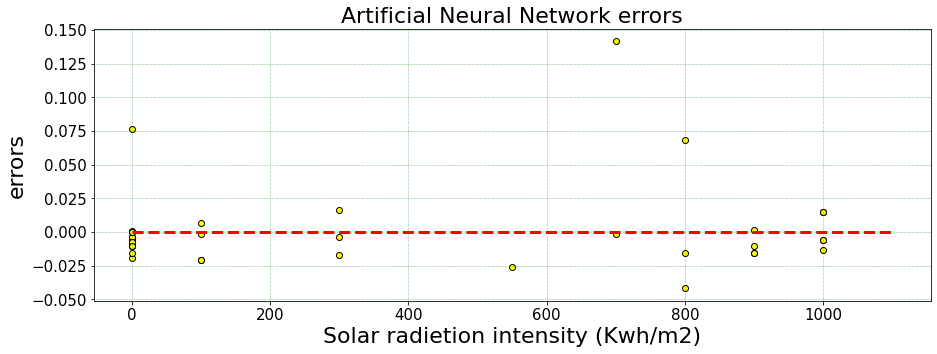

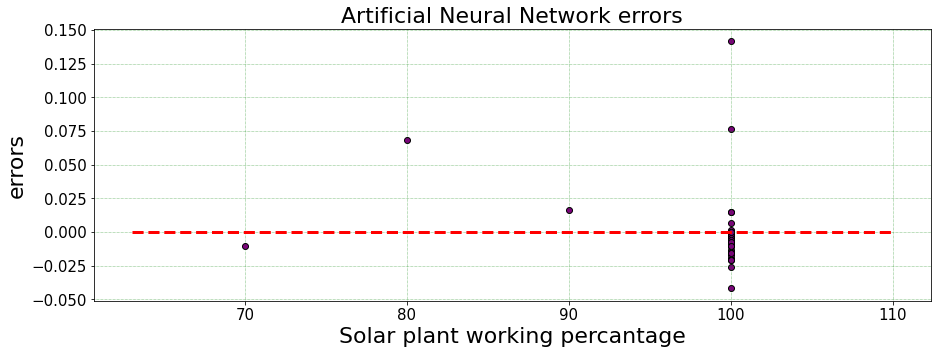

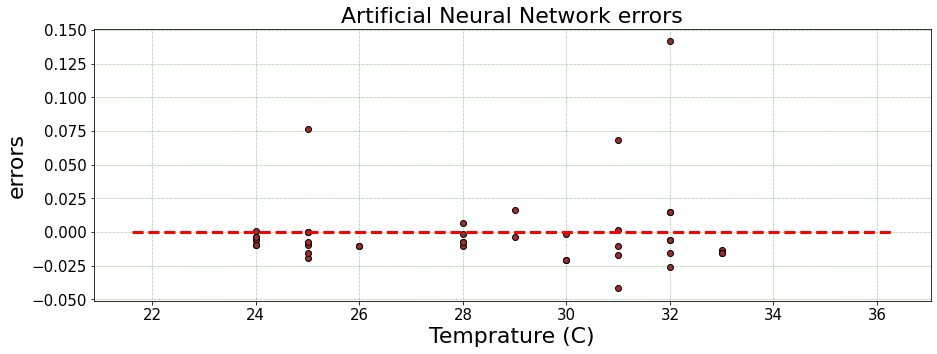

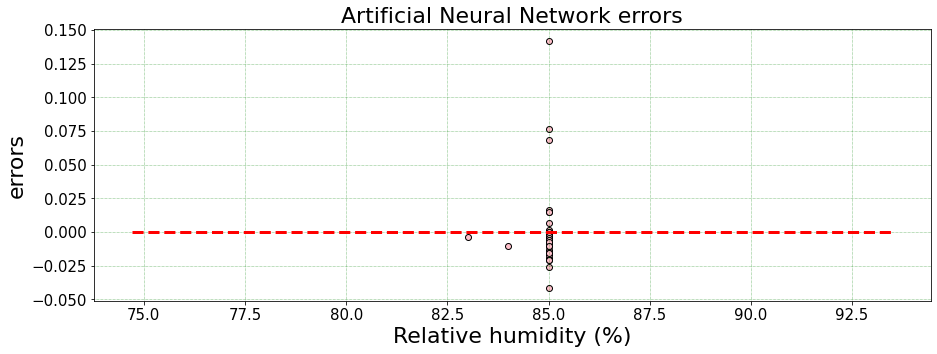

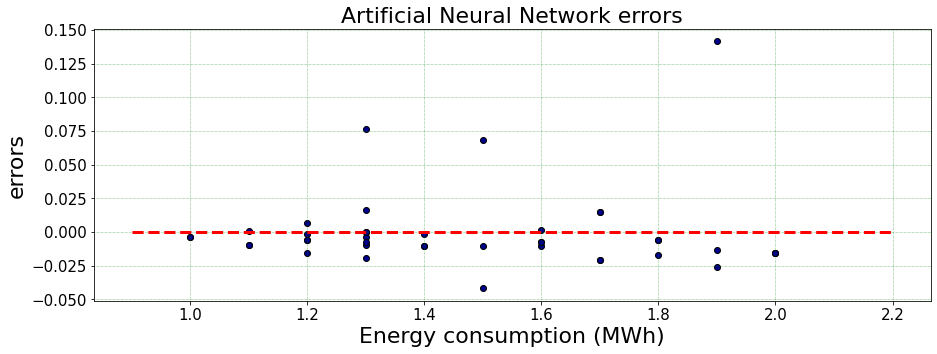

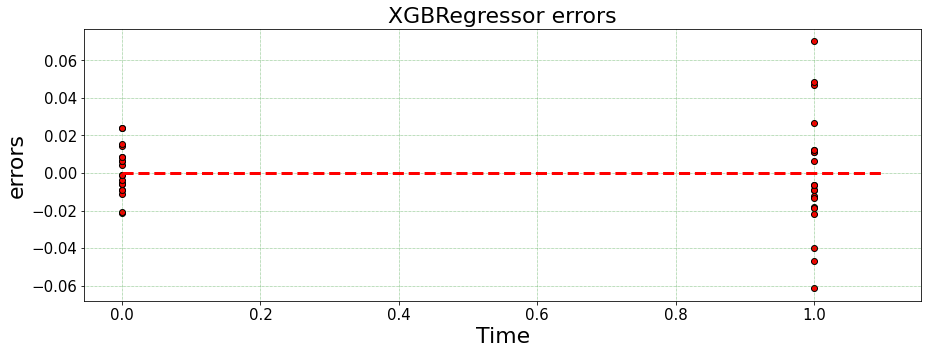

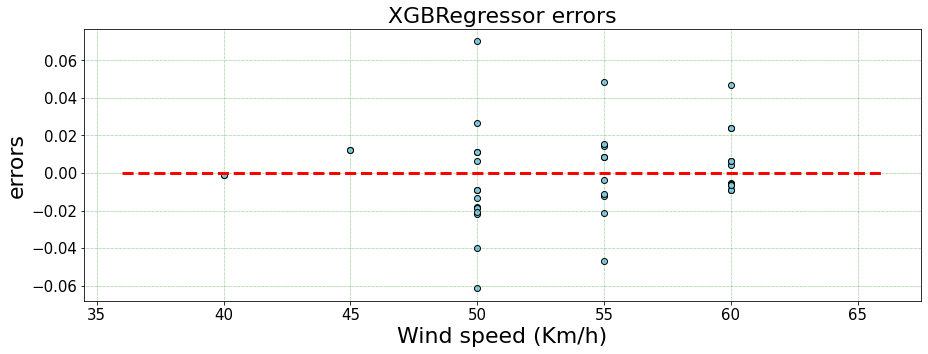

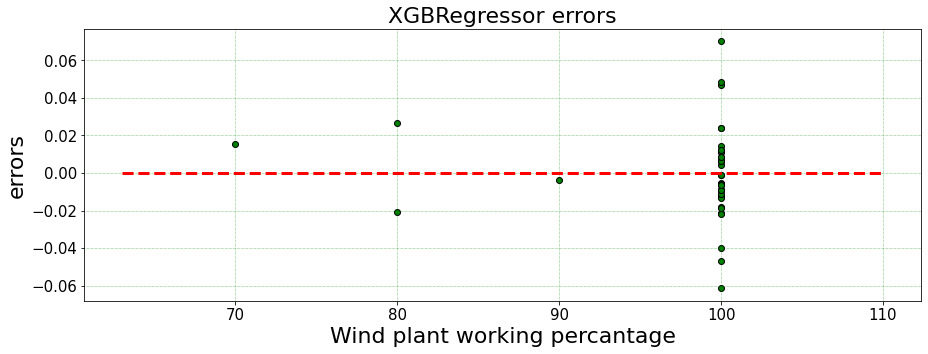

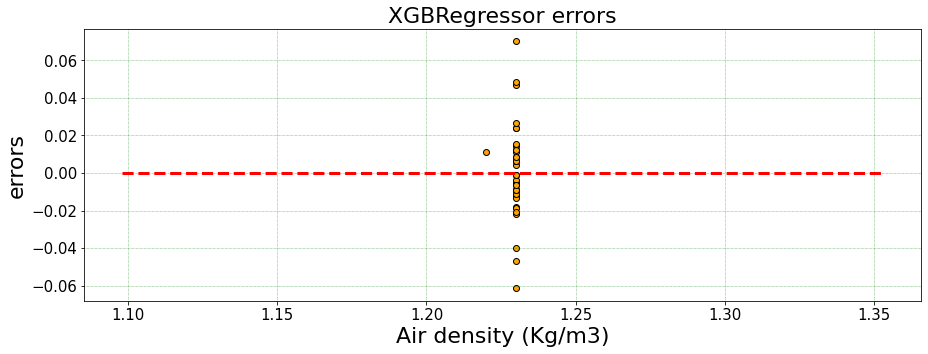

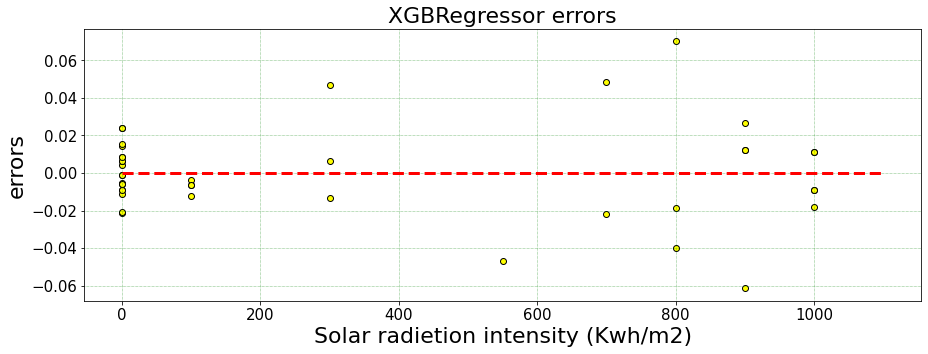

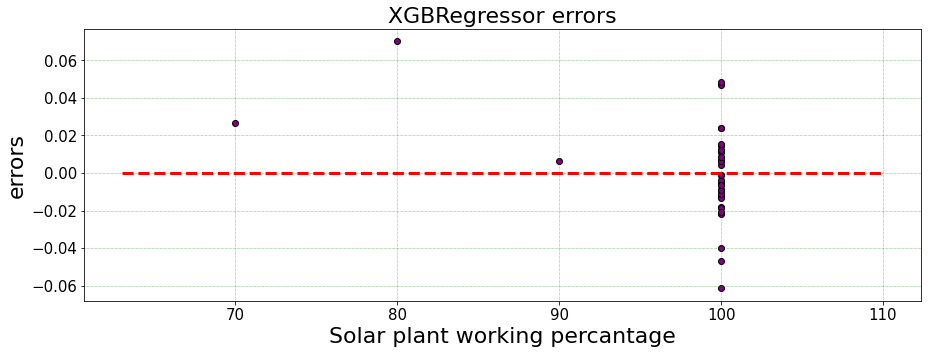

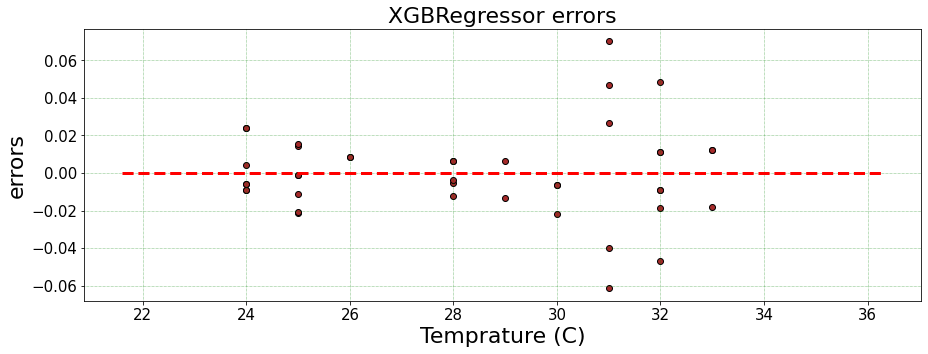

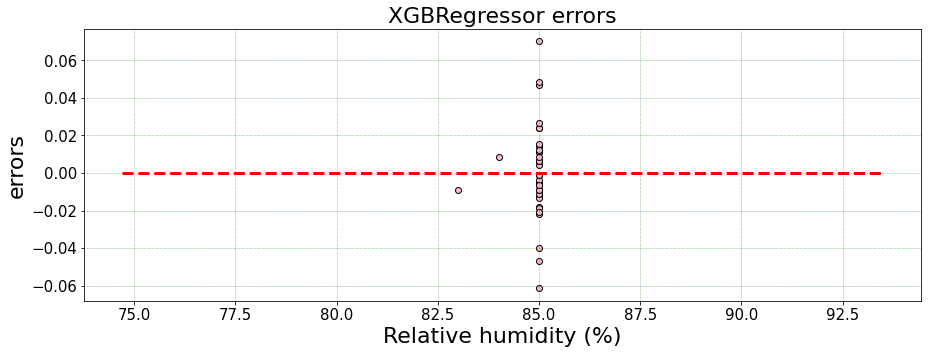

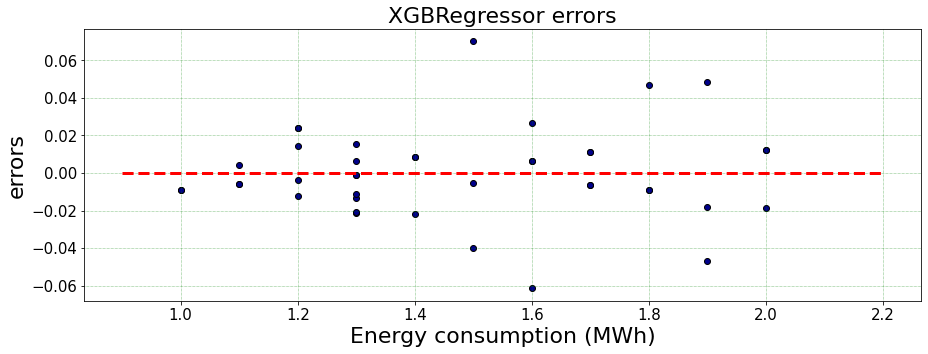

In [46]:


#plotting features and diffrent regression models errors

for f in errors.columns:
    err=errors[f]
    for i, j, z in zip(x_raw.columns , columns9 , Z) :
        plt.figure(figsize=figsize)
        plt.title("{}".format(f) , fontsize=22)
        plt.scatter(x=x_raw[i],y=err,color=z ,edgecolor='k')
        plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
        plt.xlabel(j ,fontsize=labelfontsize)
        plt.ylabel("errors", fontsize=labelfontsize)
        xmin=min(x_raw[i])
        xmax = max(x_raw[i])
        plt.hlines(y=0, xmin=xmin*0.9 , xmax=xmax*1.1 , color='red',linestyle='--', lw=3)
        plt.show()
    

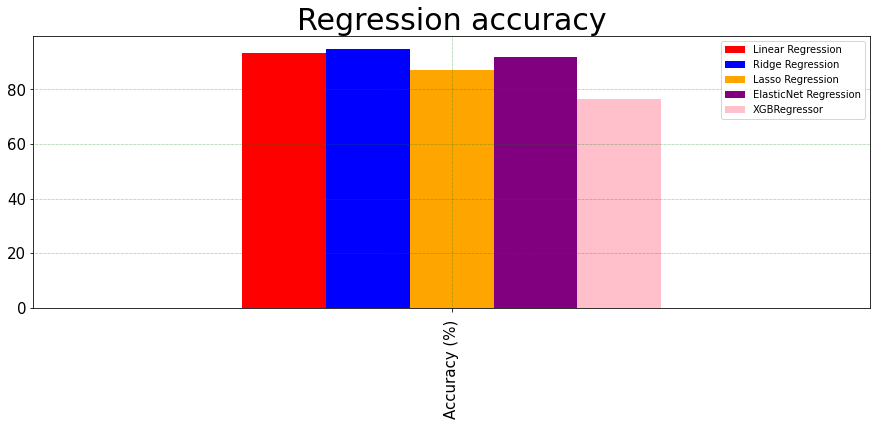

In [47]:
# plotting diffrent regression accuracy plot
AC.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                    "orange":"Lasso regression" ,"purple":"ElasticNet regression" ,"pink":"XGBRegressor" }
             , figsize=(15,5))
plt.title('Regression accuracy', fontsize=30)
plt.legend()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()



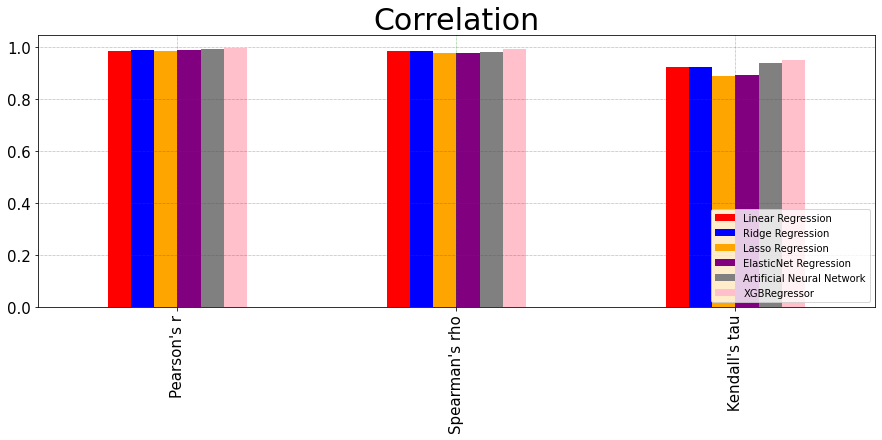

In [48]:
# plotting Correlation plot

pearsonr_LK=sp.stats.pearsonr(y, y_pred_LK)[0]
spearmanr_LK=sp.stats.spearmanr(y, y_pred_LK)[0]
kendalltau_LK=sp.stats.kendalltau(y, y_pred_LK)[0]

pearsonr_RK=sp.stats.pearsonr(y, y_pred_RK)[0]
spearmanr_RK=sp.stats.spearmanr(y, y_pred_RK)[0]
kendalltau_RK=sp.stats.kendalltau(y, y_pred_RK)[0]

pearsonr_LAK=sp.stats.pearsonr(y, y_pred_LAK)[0]
spearmanr_LAK=sp.stats.spearmanr(y, y_pred_LAK)[0]
kendalltau_LAK=sp.stats.kendalltau(y, y_pred_LAK)[0]

pearsonr_EK=sp.stats.pearsonr(y, y_pred_EK)[0]
spearmanr_EK=sp.stats.spearmanr(y, y_pred_EK)[0]
kendalltau_EK=sp.stats.kendalltau(y, y_pred_EK)[0]

pearsonr_ANNK=sp.stats.pearsonr(y, y_pred_ANNK)[0]
spearmanr_ANNK=sp.stats.spearmanr(y, y_pred_ANNK)[0]
kendalltau_ANNK=sp.stats.kendalltau(y, y_pred_ANNK)[0]

pearsonr_XK=sp.stats.pearsonr(y, y_pred_XK)[0]
spearmanr_XK=sp.stats.spearmanr(y, y_pred_XK)[0]
kendalltau_XK=sp.stats.kendalltau(y, y_pred_XK)[0]



r=pd.DataFrame({"Pearson's r":(pearsonr_LK,pearsonr_RK,pearsonr_LAK,pearsonr_EK,pearsonr_ANNK,pearsonr_XK), 
                "Spearman's rho":(spearmanr_LK , spearmanr_RK,spearmanr_LAK,spearmanr_EK,spearmanr_ANNK,spearmanr_XK) ,
                " Kendall's tau":( kendalltau_LK , kendalltau_RK ,kendalltau_LAK,kendalltau_EK,kendalltau_ANNK,kendalltau_XK)}
               , index=("Linear Regression", "Ridge Regression" , "Lasso Regression" ,"ElasticNet Regression",
                       "Artificial Neural Network" ,"XGBRegressor"))

r.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                    "orange":"Lasso regression" ,"purple":"ElasticNet regression",
                    "gray":"Artificial Neural Network" ,"pink":"XGBRegressor" }
             , figsize=(15,5))
plt.title('Correlation', fontsize=30)
plt.legend(loc=4, prop={'size': 10})
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()


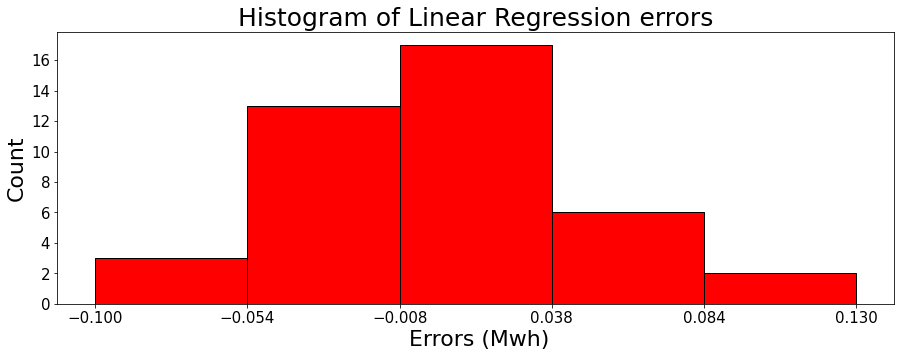

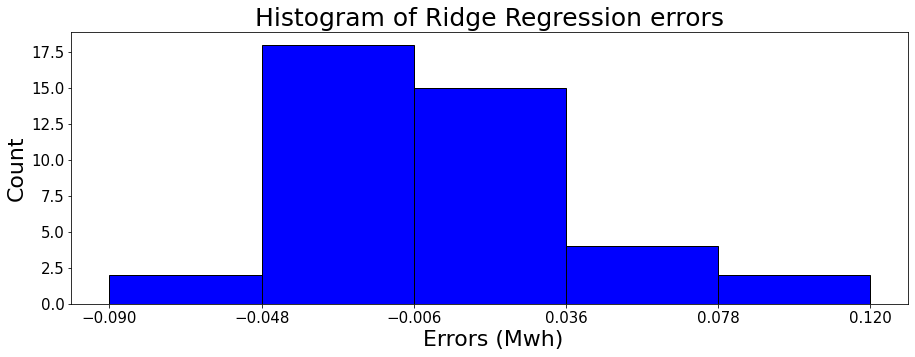

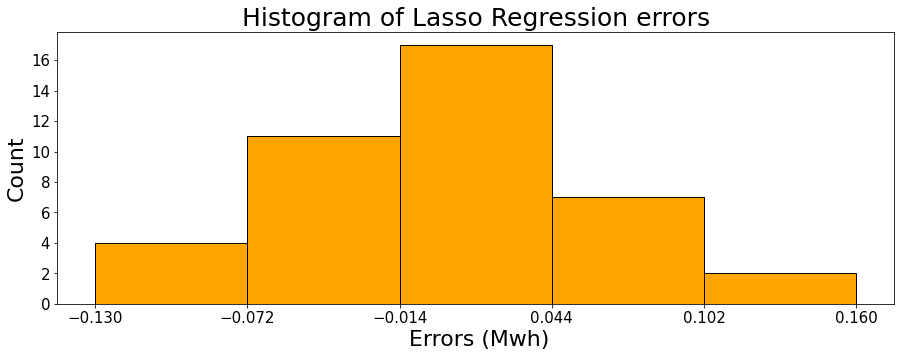

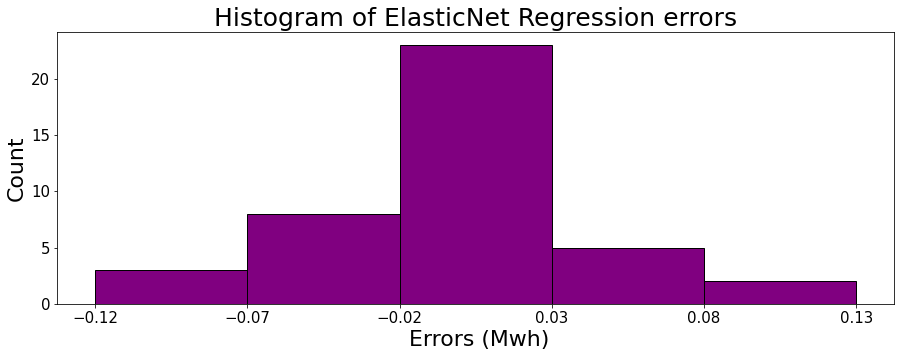

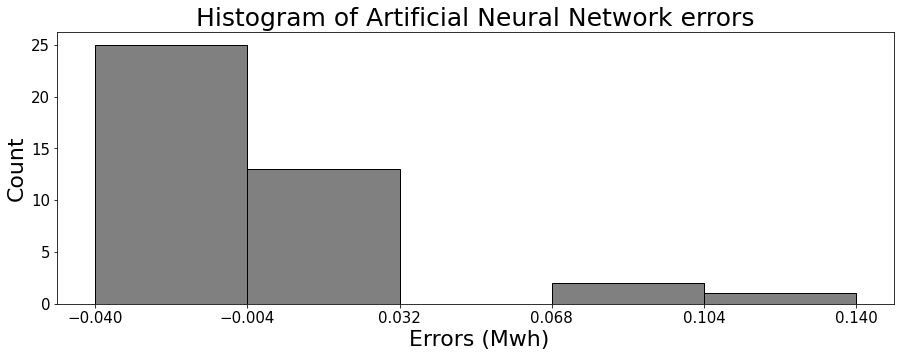

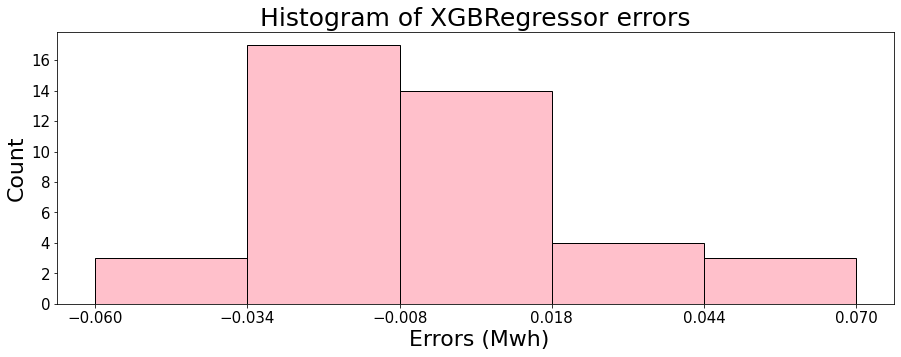

In [49]:
#Plotting historgram of regression methods errors

b=5
errors_r=errors.round(2)

for i , z in zip(errors_r.columns , colors):
    plt.figure(figsize=figsize)
    plt.rc('xtick',labelsize=labelsize)
    plt.rc('ytick',labelsize=labelsize)
    plt.hist(errors_r[i],bins=b, color=z ,edgecolor='k')
    plt.ylabel('Count', fontsize=labelfontsize)
    plt.xlabel(' Errors (Mwh)' , fontsize=labelfontsize)
    plt.title("Histogram of {}".format(i) ,fontsize=titlefontsize)
    F=(np.nanmax(errors_r[i])-np.nanmin(errors_r[i]))/b+e
    plt.xticks(np.arange(np.nanmin(errors_r[i]), np.nanmax(errors_r[i])+F, F))
    plt.show()

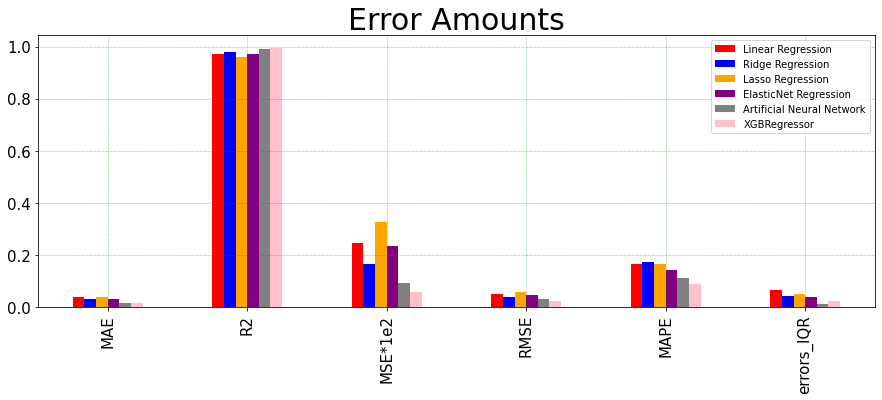

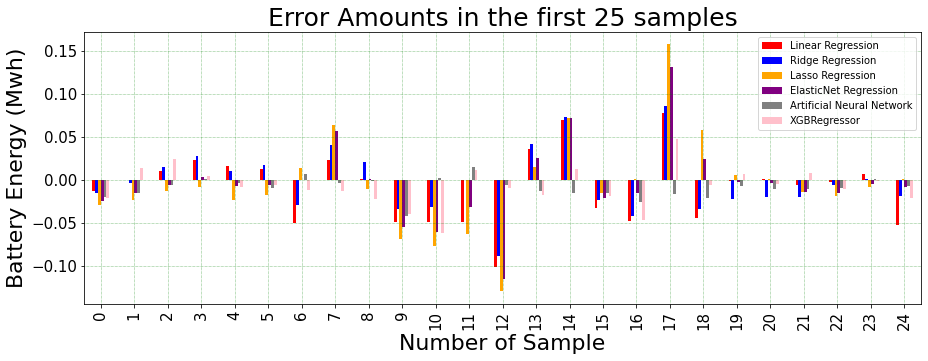

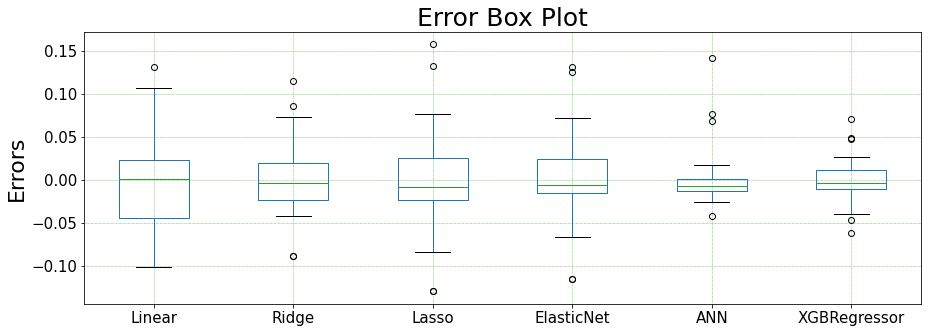

In [50]:
# plotting Error amounts

MSE_LK=mean_squared_error(y, y_pred_LK)
r2_LK=r2_score(y, y_pred_LK)
RMSE_LK= sqrt (MSE_LK)
MAE_LK= mean_absolute_error(y, y_pred_LK)
MAPE_LK=np.mean(np.abs((y - y_pred_LK) / y))




MSE_RK=mean_squared_error(y, y_pred_RK)
r2_RK=r2_score(y, y_pred_RK)
RMSE_RK= sqrt (MSE_RK)
MAE_RK= mean_absolute_error(y, y_pred_RK)
MAPE_RK=np.mean(np.abs((y - y_pred_RK) / y))



MSE_LAK=mean_squared_error(y, y_pred_LAK)
r2_LAK=r2_score(y, y_pred_LAK)
RMSE_LAK= sqrt (MSE_LAK)
MAE_LAK= mean_absolute_error(y, y_pred_LAK)
MAPE_LAK=np.mean(np.abs((y - y_pred_LAK) / y))




MSE_EK=mean_squared_error(y, y_pred_EK)
r2_EK=r2_score(y, y_pred_EK)
RMSE_EK= sqrt (MSE_EK)
MAE_EK= mean_absolute_error(y, y_pred_EK)
MAPE_EK=np.mean(np.abs((y - y_pred_EK) / y))




MSE_ANNK=mean_squared_error(y, y_pred_ANNK)
r2_ANNK=r2_score(y, y_pred_ANNK)
RMSE_ANNK= sqrt (MSE_ANNK)
MAE_ANNK= mean_absolute_error(y, y_pred_ANNK)
MAPE_ANNK=np.mean(np.abs((y - y_pred_ANNK) / y))




MSE_XK=mean_squared_error(y, y_pred_XK)
r2_XK=r2_score(y, y_pred_XK)
RMSE_XK= sqrt (MSE_XK)
MAE_XK= mean_absolute_error(y, y_pred_XK)
MAPE_XK=np.mean(np.abs((y - y_pred_XK) / y))



ERR= pd.DataFrame({'MAE': [MAE_LK , MAE_RK , MAE_LAK , MAE_EK ,MAE_ANNK, MAE_XK],
                   'R2': [r2_LK , r2_RK , r2_LAK , r2_EK , r2_ANNK, r2_XK],
                   'MSE*1e2': [MSE_LK*100 ,MSE_RK*100 , MSE_LAK*100 , MSE_EK*100 ,MSE_ANNK*100, MSE_XK*100 ] , 
                   'RMSE':[RMSE_LK , RMSE_RK, RMSE_LAK , RMSE_EK, RMSE_ANNK, RMSE_XK],
                   'MAPE':[MAPE_LK , MAPE_RK, MAPE_LAK , MAPE_EK ,MAPE_ANNK, MAPE_XK] ,
                   'errors_IQR':[iqr(errors_LK) , iqr(errors_RK) , iqr(errors_LAK) , iqr(errors_EK),
                                 iqr(errors_ANNK),iqr(errors_XK)] } ,
                    index=["Linear Regression" , "Ridge Regression" , "Lasso Regression" , 
                           "ElasticNet Regression" ,"Artificial Neural Network" ,"XGBRegressor"])


ERR.T.plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression"
                      , "orange":"Lasso regression" , "purple":"ElasticNet regression",
                     "gray":"Artificial Neural Network" ,"pink":"XGBRegressor"}, figsize=(15,5))
plt.title('Error Amounts', fontsize=30)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.legend()
plt.show()




EA25=pd.DataFrame({"Linear Regression":y_pred_LK-y , "Ridge Regression":y_pred_RK-y 
                   , "Lasso Regression":y_pred_LAK-y , "ElasticNet Regression":y_pred_EK-y,
                   "Artificial Neural Network":y_pred_ANNK-y,"XGBRegressor":y_pred_XK-y})

EA25.head(25).plot.bar(color={"red":"Linear regression" , "blue":"Ridge regression" ,
                              "orange":"Lasso regression" , "purple":"ElasticNet regression",
                              "gray":"Artificial Neural Network" ,"pink":"XGBRegressor" }, figsize=figsize)

plt.title('Error Amounts in the first 25 samples', fontsize=titlefontsize)   
plt.xlabel('Number of Sample', fontsize=labelfontsize)
plt.ylabel('Battery Energy (Mwh)', fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()



errors.columns=["Linear"]+["Ridge"]+["Lasso"]+["ElasticNet"]+["ANN"]+["XGBRegressor"]

errors.boxplot(figsize=figsize)
plt.title('Error Box Plot', fontsize=titlefontsize) 
plt.ylabel('Errors',fontsize=labelfontsize)
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()




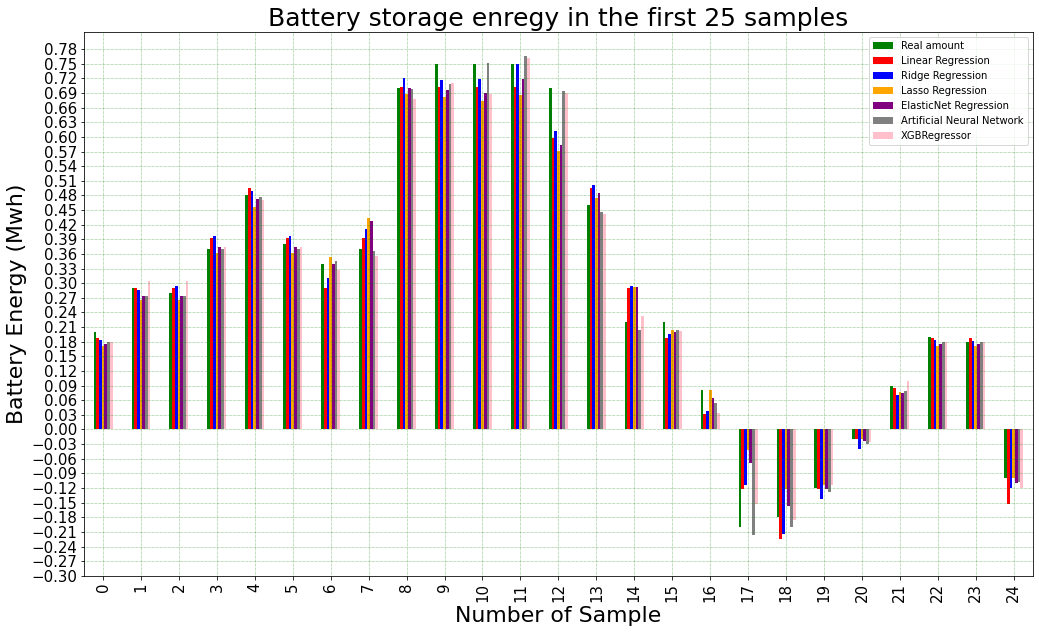

In [51]:
# plotting predicted values for battery energy in all regression models

pb=pd.DataFrame({'Real amount':y , "Linear Regression":y_pred_LK 
                 , "Ridge Regression":y_pred_RK , "Lasso Regression":y_pred_LAK ,
                 "ElasticNet Regression":y_pred_EK ,"Artificial Neural Network":y_pred_ANNK,
                 "XGBRegressor":y_pred_XK})

pb.head(25).plot.bar(color={ "green":"Real amount" , "red":"Linear regression" , "blue":"Ridge regression" ,
                            "orange":"Lasso regression" , "purple":"ElasticNet regression" , 
                           "gray":"Artificial Neural Network" ,"pink":"XGBRegressor"}, figsize=(17,10))
plt.title('Battery storage enregy in the first 25 samples', fontsize=titlefontsize)       
plt.xlabel('Number of Sample', fontsize=labelfontsize)
plt.ylabel('Battery Energy (Mwh)', fontsize=labelfontsize)
EE=np.round(np.mean(abs(y-y_pred_RK)) , 2)
plt.yticks(np.arange(np.round(min(y)-EE , 1), max(y)+EE, EE))  
plt.legend(loc=1, prop={'size': 10})
plt.grid(which='major', linestyle=':', linewidth='0.5', color='green')
plt.show()

## 5- Testing with New Sample
Now we can test the controlling system with new data to evaluate that.
In order to insert new data please enter the amounts of nine factors which are shown below:

***Time, Wind speed (Km/h), Wind plant working percantage, Air density (Kg/m3), Solar radietion intensity (Kwh/m2), Solar plant working percantage, Temprature, Relative humidity (%), Energy consumption (Mwh)***

*Remember to insert the amounts with a single space and without comma*

*In Time 0 means night and 1 means day*

*If you don't know one of requested amounts please enter 'NAN' instead of that*

##### Examples:

 ----> 0 55.0 80 1.23 0 100 25 85 1.3

 ----> 1 45 60 NAN 1000 75 33 90 1.5

 ----> 0 53.78 98.05 1.23 352.44 98.54 28.32 85 1.48

 ----> 1 NAN 40 NAN 700 95 22 75 1.1

### 5-1  The input preprocessing

In [52]:
NAN=np.nan
df2=df.drop(['b_eng'], axis=1)

print('Please enter the amounts:')
sample=list(input().split())
sample= np.array(sample, dtype='float')
sample=sample.reshape(1,-1)


sample=pd.DataFrame(sample)
sample.columns=df2.columns
sample=sample.fillna(df.mean())

LL=np.nanpercentile(df2, 5, axis=0)
HH=np.nanpercentile(df2, 95, axis=0)

sample=pywt.threshold(sample, LL, 'greater', LL)
sample=pywt.threshold(sample, HH, 'less', HH)

sample=pd.DataFrame(sample, index=['Preprossed Input'])

sample.columns=columns9


print("")
print('Preprocessed Input is:')
sample['Time'] = sample.Time.astype(int)

sample=sample.round(2)

display(sample)

Please enter the amounts:
1 45 60 NAN 1000 75 33 90 1.5

Preprocessed Input is:


,Time,Wind speed (Km/h),Wind plant working percantage,Air density (Kg/m3),Solar radietion intensity (Kwh/m2),Solar plant working percantage,Temprature (C),Relative humidity (%),Energy consumption (MWh)
Preprossed Input,1,45.0,80.0,1.23,1000.0,90.0,33.0,85.0,1.5


### 5-2  Finding an appropriate method according to the input

In [53]:
# Applying Grid Search to find the best parameters for the KNN classifier to 
# predict the appropriate regression method  




sample=scaler.transform(sample)
sample_sfs=sample[: ,feat_cols ]
res_abs=pd.DataFrame(errors.abs())
best_method=res_abs.idxmin(axis = 1)



from sklearn.svm import SVC
classifier = SVC()

classifier.fit(x,best_method)


from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'] ,
               'degree': [1 ,2 , 3, 4, 5, 6 , 7, 8, 9, 10 ],
               'C': [1 , 2, 3, 4, 5 , 6, 7, 8,9 , 10 ],
               }] 

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)
grid_search = grid_search.fit(x, best_method)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_




C_value=best_parameters['C']
degree_value = best_parameters['degree']
kernel_value = best_parameters['kernel']
classifier = SVC(kernel=kernel_value , degree=degree_value, C=C_value )
classifier.fit(x,best_method)
considered_best_method = classifier.predict(sample)

print("Best Parameters to optimise the classifier:", best_parameters)
print('---------------------------')



if considered_best_method[0]=='Linear':
    sample=sample[: ,feat_cols ]
    model=L
    method='Linear Regression'
    print("Appropriate method according to the input is Linear Regression")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_LK*100))
if considered_best_method[0]=='Ridge' :
    model=R
    method='Ridge Regression'
    print("Appropriate method according to the input is Ridge Regression")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_RK*100))
if considered_best_method[0]=='Lasso':
    model=LA
    method='Lasso Regression'
    print("Appropriate method according to the input is Lasso Regression")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_LAK*100))
if considered_best_method[0]=='ElasticNet' :
    model=E
    method='ElasticNet Regression'
    print("Appropriate method according to the input is ElasticNet Regression")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_EK*100))
if considered_best_method[0]=='ANN':
    sample=sample[: ,feat_cols ]
    model=ANN
    method='Artificial Neural Network'
    print("Appropriate method according to the input is Artificial Neural Network")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_ANNK*100))
if considered_best_method[0]=='XGBRegressor':
    sample=sample[: ,feat_cols ]
    sample=pd.DataFrame(sample)
    sample.columns=x_sfs.columns
    model=xg_reg
    method='XGboost'
    print("Appropriate method according to the input is XGboost")
    print('R-squared percentage for this method is = %.3f%%'  %  (r2_XK*100))


Best Parameters to optimise the classifier: {'C': 8, 'degree': 1, 'kernel': 'rbf'}
---------------------------
Appropriate method according to the input is Artificial Neural Network
R-squared percentage for this method is = 98.898%


### 5-3  Predicting the battery energy value

In [54]:
y_pred_sample=model.predict(sample)
y_pred_sample=np.around(y_pred_sample, decimals=3)

print('Optimised value for the Battery Energy according to %s method is = %.3f (MWh)'  %  (method ,y_pred_sample [0]))

Optimised value for the Battery Energy according to Artificial Neural Network method is = 0.360 (MWh)


## 6- Discussion

The purpose of this investigation was to predict the energy amount of Battery storage in order to optimize the operation of a smart grid. The data, which was used in this study, was collected from several websites. To achieve this goal six regression methods including Linear Regression, Ridge Regression, Lasso Regression and Elastic Net Regression XGboost and Artificial Neural Network were used.

First, we started pre-processing the data and removed amounts that were out of normal range and also incomplete rows of data and duplicates. In this stage, in addition to managing missing values, we standardized features. Then using heat-map plot and feature selection methods, suitable features got extracted and we considered appropriate coefficients for them. After separating the data into training and test parts, several regression methods including the Linear Regression, the Ridge Regression, the Lasso Regression, the Elastic-Net Regression, the Artificial Neural Network and the XGboost became trained and tested.

In The next step, we visualized amounts of errors (that is the difference between real values and the predicted values) in each method according to the predicted values. By looking at the plot we found out in ANN method the most of amounts of errors were close to zero. By looking at the next plot it is clear to see amounts of errors according to the methods and the amount of features. In the next stage, we can easily understand that among all regression methods, the Ridge regression model had the most and XGboost had the least accuracy.

Then in correlation plot, it is obvious that ANN and XGboost has the highest correlation amount for the Pearsonr, the Spearmanr and the Kendalltau unlike the Elastic-Net method that had the lowest amounts. Next, in histogram plot of errors we saw the distribution of errors and what we can understand from this plot and the Error Box Plot in the following, is that again it is clear that in ANN method the most of the amounts of the errors are much closer to zero than other methods. After that in Error amounts plot by looking at the amounts of the mean square error(MSE), R2 score, Root Mean Square Error (RMSE), mean absolute error (MAE) and mean absolute percentage error (MAPE) we can see that the operation of ANN and XGboost were better than others.

In the last section an option has been considered for users to input the needed amounts and get the predicted value o the Battery Storage. In this section SVM classification method is optimized with the help of the GridSearchCV to find the best regressor according to the input. And finally you saw the predicted value for The Battery Storage and the regression method that was used and its R-squared percentage.


<img src="img/1.png">